## CM3070 Final Year Project 

## Enhancing Land Use Classification Using Satellite Imagery and Deep Learning



## 1. Introduction 
Satellite Imagery provides information on land cover, and the types of human activity involved in land use. It is important for many applications including environmental monitoring, urban planning, resource management, disaster response etc.

The above applications require manual identification of objects and facilities in the imagery. Considering the vast geographical expanses this method was time consuming and  susceptible to errors. Therefore, to address these challenges Land classification was automated and is now evolving from manual surveys and manual interpretation of aerial imagery to advanced machine learning with high resolution data collected about our planet through satellites and sensors. The advent of deep learning particularly Convolutional Neural Networks(CNNs), has revolutionized the field by providing more accurate and automated solutions.

A plethora of land cover classification algorithms have been developed, with solid theoretical foundations, based on spectral and spatial properties of the pixels. However, the task becomes incrementally more difficult as the level of abstraction increases, going from pixels, to objects, and then to entire scenes.


### 1.1 Template
CM 3015 Machine Learning and Neural Networks – Project Idea Title 1: Deep Learning on a public dataset.

### 1.2 Project Overview 
The primary objective of this project is to explores the problem of developing a Deep learning system to classify land types in high resolution, multi-spectral EuroSat satellite imagery dataset into ten distinct classes such as residential, industrial, river, forest and others using an ensemble of multiple convolution neural networks(CNNs) including both custom and pre-trained models like ResNet, DeseNet, VGG, EfficientNet, InceptionV3 and GoogleNet. 

The system also aims to Fine-tune the pretrained models to leverage their powerful feature extraction capabilities and using hyperparameter tuning techniques to optimize the models for the best performance.  
Additionally, the project intends to investigate whether incorporating object detection to identify and classify specific objects within the satellite imagery, such as buildings, vehicles and trees etc can enhance the classification accuracy and robustness(discussed further in project design). 

By evaluating various CNN architectures and exploring the integration of object detection, we aim to push the boundaries of current methodologies and potentially enhance classification performance.


## 2. Dataset

### 2.1 Overview of the Data

The dataset can be obtained from this link https://github.com/phelber/EuroSAT

The EuroSAT dataset is a collection of satellite images covering 13 different land use and land cover (LULC) classes, designed for land use classification tasks. Here's a brief description of the EuroSAT dataset:

<b>Purpose</b>: EuroSAT is used primarily for evaluating and benchmarking machine learning models in the context of remote sensing and land use classification.

<b>Content</b>: It consists of 27,000 labeled images acquired by the Sentinel-2 satellite, covering various geographic locations across Europe. The images are distributed evenly across 13 different classes representing different types of land cover.

<b>Classes</b>: The dataset includes the following 13 classes:

Annual Crop
Forest
Herbaceous Vegetation
Highway
Industrial
Pasture
Permanent Crop
Residential
River
Sea Lake
Snow
Vegetation
Waterways

## 3. Dataset Acquisition 

### 3.1 Importing Necessary Libraries
              

In [3]:
# To extract zip file
!pip install tensorflow
import zipfile
import os

# To verify number of images in each class
from collections import defaultdict

# To Plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

# # To display image sample
!pip install opencv-python
import cv2

from PIL import Image

### 3.2 Extract the ZIP file 

Extracting the contents of the ZIP file `EuroSAT (2).zip` into the `EuroSAT` directory.

In [4]:
zip_file_path = 'EuroSAT (2).zip'
extracted_dir = 'EuroSAT/EuroSAT'
image_dir = extracted_dir

# Create the extraction directory if it does not exist
if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('EuroSAT')

print("Extraction completed.")

Extraction completed.


## 4 Initial Exploratory Data Analysis

### 4.1 Listing contents of the extracted directory 

In [5]:
# Print the directory structure after extraction
for root, dirs, files in os.walk(extracted_dir):
    print(f"Current directory: {root}")

Current directory: EuroSAT/EuroSAT
Current directory: EuroSAT/EuroSAT\AnnualCrop
Current directory: EuroSAT/EuroSAT\Forest
Current directory: EuroSAT/EuroSAT\HerbaceousVegetation
Current directory: EuroSAT/EuroSAT\Highway
Current directory: EuroSAT/EuroSAT\Industrial
Current directory: EuroSAT/EuroSAT\Pasture
Current directory: EuroSAT/EuroSAT\PermanentCrop
Current directory: EuroSAT/EuroSAT\Residential
Current directory: EuroSAT/EuroSAT\River
Current directory: EuroSAT/EuroSAT\SeaLake


### 4.2 Verifying number of images in each class:

Counting the number of images in each subdirectory, where each subdirectory represents a class.

In [6]:
import pandas as pd
from tabulate import tabulate

# Initialize list to store data
data = []

# Iterate through each class folder
for class_name in os.listdir(extracted_dir):
    class_dir = os.path.join(extracted_dir, class_name)
    if os.path.isdir(class_dir):
        image_files = [file for file in os.listdir(class_dir) if file.endswith(('.jpg', '.png'))]
        if image_files:
            # Get the first image to extract dimensions and channels
            img = cv2.imread(os.path.join(class_dir, image_files[0]))
            height, width, channels = img.shape
            # Append data for the current class
            data.append([class_name, len(image_files), height, width, channels])

# Create DataFrame
df = pd.DataFrame(data, columns=['Class', 'Number of Images', 'Image Height', 'Image Width', 'Color Channels'])

# Print the table with borders using tabulate
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+----------------------+--------------------+----------------+---------------+------------------+
|    | Class                |   Number of Images |   Image Height |   Image Width |   Color Channels |
+====+======================+====================+================+===============+==================+
|  0 | AnnualCrop           |               3000 |             64 |            64 |                3 |
+----+----------------------+--------------------+----------------+---------------+------------------+
|  1 | Forest               |               3000 |             64 |            64 |                3 |
+----+----------------------+--------------------+----------------+---------------+------------------+
|  2 | HerbaceousVegetation |               3000 |             64 |            64 |                3 |
+----+----------------------+--------------------+----------------+---------------+------------------+
|  3 | Highway              |               2500 |             64 |      

### 4.3 Class Distribution

Creating a bar plot to visualize the class distribution, with each bar representing a class and its corresponding number of images.

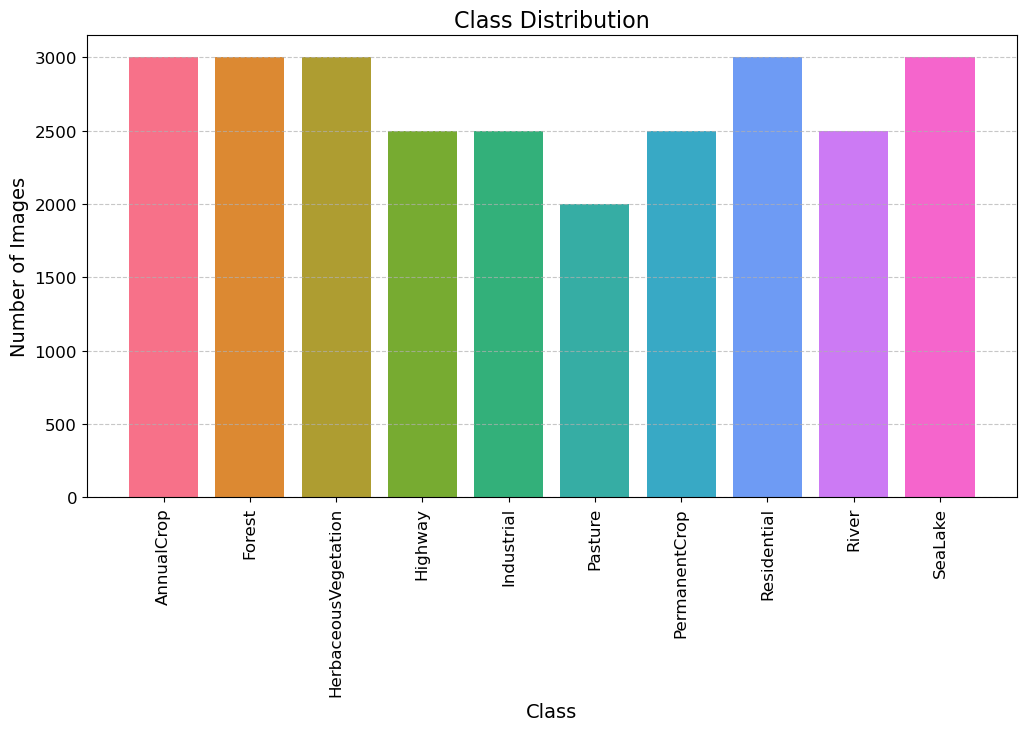

In [7]:
# Define vibrant colors using a color palette
class_counts = defaultdict(int)
for root, dirs, files in os.walk(extracted_dir):
    class_name = os.path.basename(root)
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            class_counts[class_name] += 1
            
colors = sns.color_palette("husl", len(class_counts))

# Plot the class distribution with vibrant colors
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color=colors)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Class Distribution', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### 4.4 Image Samples

Plotting one sample image from each class in a grid

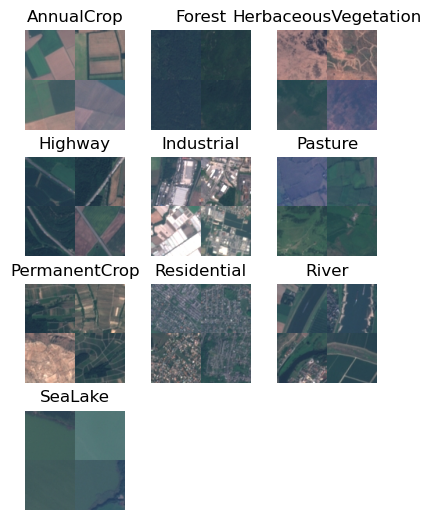

In [8]:
# # Plot class collages
# plot_class_collages(classes_images, num_images_per_class=4, collage_size=(64, 64), num_classes_per_row=3, padding=0.5)
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random

def create_collage(images, img_size=(64, 64), num_cols=2, num_rows=2, padding=0.2):
    """
    Create a collage of images with specified rows and columns.

    :param images: List of image arrays.
    :param img_size: Size of each image in the collage.
    :param num_cols: Number of columns in the collage.
    :param num_rows: Number of rows in the collage.
    :param padding: Padding between images.
    :return: Collage image as a NumPy array.
    """
    collage_width = img_size[0] * num_cols
    collage_height = img_size[1] * num_rows
    collage = np.ones((collage_height, collage_width, 3), dtype=np.uint8) * 255  # White background
    
    for i, img in enumerate(images):
        row = i // num_cols
        col = i % num_cols
        x_start = col * img_size[0]
        y_start = row * img_size[1]
        resized_img = cv2.resize(img, img_size)
        collage[y_start:y_start+img_size[1], x_start:x_start+img_size[0]] = resized_img
    
    return collage

def plot_class_collages(classes, num_images_per_class=4, collage_size=(64, 64), num_classes_per_row=3, padding=0.5):
    """
    Plot collages for each class with multiple images.
    
    :param classes: Dictionary with class names as keys and lists of image paths as values.
    :param num_images_per_class: Number of images to include in each class's collage.
    :param collage_size: Size of each image in the collage.
    :param num_classes_per_row: Number of class collages per row.
    :param padding: Padding between collages.
    """
    num_classes = len(classes)
    num_rows = (num_classes + num_classes_per_row - 1) // num_classes_per_row
    collage_width = collage_size[0] * 2
    collage_height = collage_size[1] * 2
    fig_width = (collage_width + padding) * num_classes_per_row
    fig_height = (collage_height + padding) * num_rows
    
    fig, axes = plt.subplots(num_rows, num_classes_per_row, figsize=(fig_width / 100, fig_height / 100))
    axes = axes.flatten()

    for i, (class_name, image_paths) in enumerate(classes.items()):
        # Randomly select images for the collage
        selected_images = random.sample(image_paths, min(num_images_per_class, len(image_paths)))
        sample_images = [cv2.imread(p) for p in selected_images]
        collage_img = create_collage(sample_images, img_size=collage_size, num_cols=2, num_rows=2, padding=padding)
        
        ax = axes[i]
        ax.imshow(cv2.cvtColor(collage_img, cv2.COLOR_BGR2RGB))
        ax.set_title(class_name)
        ax.axis('off')
    
    for i in range(num_classes, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout(pad=padding)
    plt.show()

# Prepare data for plotting
classes_images = {}
for class_name in class_counts.keys():
    class_dir = os.path.join(extracted_dir, class_name)
    image_files = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg') or img.endswith('.png')]
    classes_images[class_name] = image_files

# Plot class collages with randomly selected images
plot_class_collages(classes_images, num_images_per_class=4, collage_size=(64, 64), num_classes_per_row=3, padding=0.5)


### 4.5 Image Properties

Checking image sizes, dimensions, and color channels to ensure consistency within directory of images

In [9]:
import numpy as np 

def analyze_image_sizes(image_dir):
    sizes = []
    aspect_ratios = set()
    
    for class_name in os.listdir(image_dir):
        class_dir = os.path.join(image_dir, class_name)
        if os.path.isdir(class_dir):
            for img_file in os.listdir(class_dir):
                if img_file.lower().endswith(('png', 'jpg', 'jpeg')):
                    img_path = os.path.join(class_dir, img_file)
                    with Image.open(img_path) as img:
                        size = img.size
                        sizes.append(size)
                        aspect_ratio = size[0] / size[1]
                        aspect_ratios.add(aspect_ratio)
    
    sizes = list(set(sizes))
    print("Unique image sizes:", sizes)
    print("Unique aspect ratios:", aspect_ratios)

analyze_image_sizes(image_dir)

Unique image sizes: [(64, 64)]
Unique aspect ratios: {1.0}


### 4.6 Statistical Analysis

Computing basic statistics like mean and standard deviation of pixel values for normalization

In [10]:
image_pixels = []

# Collect pixel values
for root, dirs, files in os.walk(extracted_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            img = cv2.imread(os.path.join(root, file))
            image_pixels.append(img.flatten())

# Convert to numpy array for analysis
image_pixels = np.concatenate(image_pixels)

# Compute statistics
mean_pixel_value = np.mean(image_pixels)
std_pixel_value = np.std(image_pixels)

print(f'Mean pixel value: {mean_pixel_value:.2f}')
print(f'Standard deviation of pixel values: {std_pixel_value:.2f}')

Mean pixel value: 96.26
Standard deviation of pixel values: 40.37


### 4.7 Identify Anomalies

Looking for any corrupted or mislabeled images

In [11]:
# Check for corrupted images by trying to read them
corrupted_images = []

for root, dirs, files in os.walk(extracted_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            try:
                img = cv2.imread(os.path.join(root, file))
                if img is None:
                    corrupted_images.append(os.path.join(root, file))
            except:
                corrupted_images.append(os.path.join(root, file))

print(f'Found {len(corrupted_images)} corrupted images')
if corrupted_images:
    print('Corrupted images:', corrupted_images)


Found 0 corrupted images


## 5 Data Preprocessing 

Loading and preprocessesing images from a directory, preparing them for model training

Here images are loaded from the directory, resized to 64x64 pixels, and stored in a NumPy array along with their corresponding labels.

In [12]:
# Define image size
image_size = (64, 64)

# Initialize lists to hold images and labels
images = []
labels = []

# Load the images and labels
for label in os.listdir(image_dir):
    class_dir = os.path.join(image_dir, label)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(image_size)
            images.append(np.array(img))
            labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(f'Loaded {len(images)} images with shape {images[0].shape}')
images = np.array(images)
labels = np.array(labels)

# Verify the total number of images and labels
print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")

Loaded 27000 images with shape (64, 64, 3)
Total images loaded: 27000
Total labels loaded: 27000


### 5.1  Normalization 

Normalizing the pixel values of the images

In [13]:
# Normalizing images by scaling pixel values to [0, 1]
images = images.astype('float32') / 255.0

### 5.2 Standardization

Standardizing the images

In [14]:
mean = np.mean(images, axis=(0, 1, 2))
std = np.std(images, axis=(0, 1, 2))
images = (images - mean) / std

### 5.3 Handling Class Imbalance

Using SMOTE to balance the class distribution in the dataset

In [15]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
smote = SMOTE()
images_resampled, labels_resampled = smote.fit_resample(images.reshape((images.shape[0], -1)), labels_encoded)
images_resampled = images_resampled.reshape((-1, image_size[0], image_size[1], 3))


C:\Users\varsh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\varsh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Plotting the distribution of classes in the dataset after applying SMOTE:

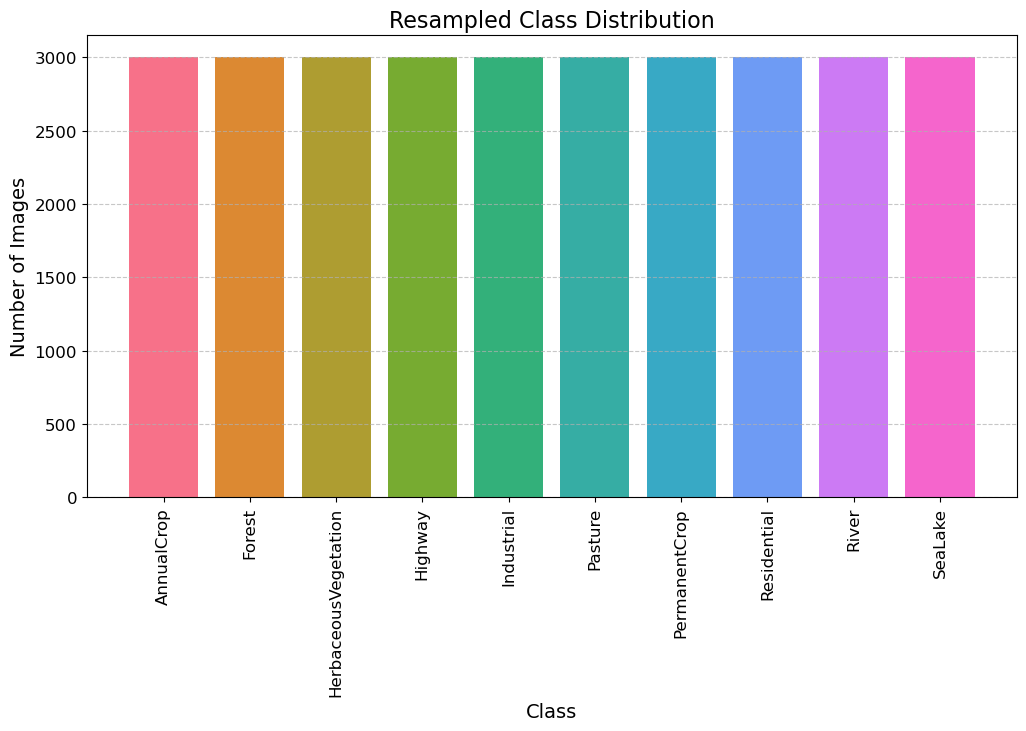

In [16]:
from collections import Counter

# Calculate resampled class distribution
resampled_class_distribution = Counter([label_encoder.classes_[i] for i in labels_resampled])

# Define vibrant colors using a color palette
colors = sns.color_palette("husl", len(resampled_class_distribution))

# Plot the resampled class distribution with vibrant colors
plt.figure(figsize=(12, 6))
plt.bar(resampled_class_distribution.keys(), resampled_class_distribution.values(), color=colors)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Resampled Class Distribution', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### 5.4 Label Encoding 

Converting the resampled class labels into a one-hot encoded format:

In [17]:
import tensorflow as tf
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
               'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
labels_one_hot = tf.keras.utils.to_categorical(labels_resampled, num_classes=len(class_names))

### 5.5 Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split

# First, split the data into 80% for training and validation, and 20% for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(
    images_resampled, labels_resampled,
    test_size=0.2,  # 20% of the data will be test
    random_state=42
)

# Then, split the remaining 80% into 70% training and 10% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.1 / 0.8,  # 10% of the 80% (which is 1/8 of the total) will be validation
    random_state=42
)

# Print the shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (21000, 64, 64, 3)
X_val shape: (3000, 64, 64, 3)
X_test shape: (6000, 64, 64, 3)


### 5.6 Data augmentation

In [19]:
BATCH_SIZE = 32
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator()

# Create data generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)
test_generator = validation_datagen.flow(X_test, y_test, batch_size=BATCH_SIZE, shuffle=False)


## Model Development 

## Model 1 - Baseline model of Convolutional Neural Network(CNN)

I set up and trained a Convolutional Neural Network (CNN) using TensorFlow and Keras for image classification. I began by importing the necessary libraries and defining constants such as image size, batch size, and the number of classes. I then created a CNN model with convolutional, max-pooling, and dense layers to process and classify images into 10 categories. The model was compiled with the Adam optimizer and sparse categorical crossentropy loss. After training the model using specified data generators for 10 epochs, I plotted the training and validation accuracy and loss to visualize the learning process. I then made predictions on the test set and evaluated the results using a classification report, confusion matrix, and metrics like precision, recall, and F1 score, with a heatmap of the confusion matrix displayed for clarity.

C:\Users\varsh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │       1,968,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,969,738 (7.51 MB)

 Trainable params: 1,969,738 (7.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 37s 27ms/step - accuracy: 0.2668 - loss: 1.8691 - val_accuracy: 0.4623 - val_loss: 1.4686
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.4547 - loss: 1.4712 - val_accuracy: 0.5483 - val_loss: 1.2992
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.5387 - loss: 1.3008 - val_accuracy: 0.5827 - val_loss: 1.1909
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.5643 - loss: 1.2007 - val_accuracy: 0.5663 - val_loss: 1.1791
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.5912 - loss: 1.1214 - val_accuracy: 0.6083 - val_loss: 1.1420
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.6018 - loss: 1.0888 - val_accuracy: 0.6163 - val_loss: 1.0741
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.6185 - loss: 1.0516 - val_accuracy: 0.6060 - val_loss: 1.0779
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.6195 -

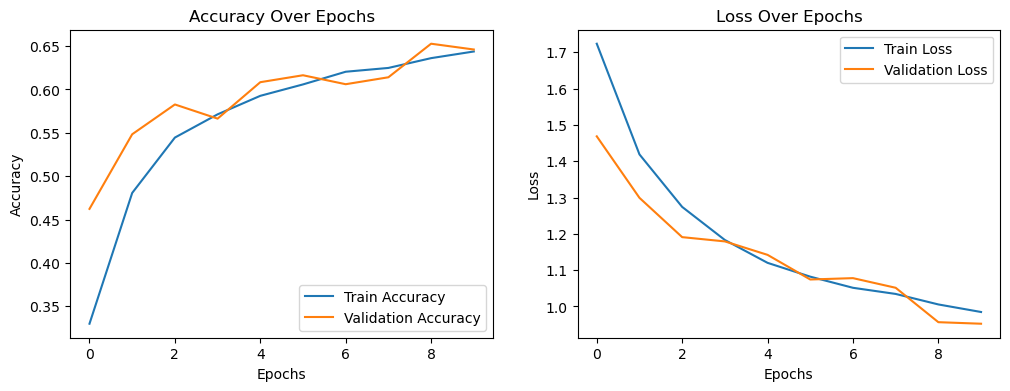

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.60      0.74      0.66       567
              Forest       0.80      0.87      0.83       612
HerbaceousVegetation       0.58      0.71      0.64       609
             Highway       0.50      0.31      0.38       629
          Industrial       0.90      0.82      0.86       605
             Pasture       0.68      0.87      0.76       606
       PermanentCrop       0.63      0.33      0.43       565
         Residential       0.53      0.87      0.66       595
               River       0.71      0.49      0.58       594
             SeaLake       0.89      0.71      0.79       618

            accuracy                           0.67      6000
           macro avg       0.68      0.67      0.66      6000
        weighted avg       0.68      0.67      0.66      6000



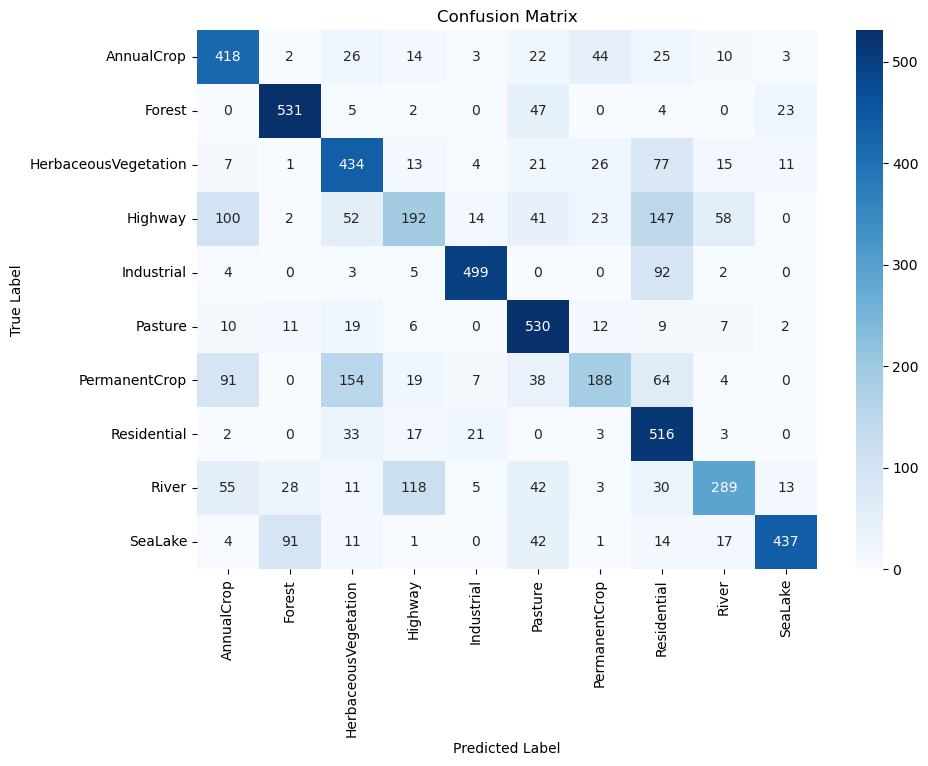

Precision: 0.6828
Recall: 0.6723
F1 Score: 0.6607


In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define constants
IMAGE_SIZE = (64, 64)  
BATCH_SIZE = 32
NUM_CLASSES = 10  

# Define the baseline CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10, 
    batch_size=BATCH_SIZE
)

# Add graph plotting for training and validation metrics
def plot_training_history(history):
    # Plot accuracy over epochs
    plt.figure(figsize=(12, 4))
    
    # Accuracy graph
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss graph
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Predict on the test set
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test  # Use original y_test labels

# Compute classification report
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
               'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, and F1-score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


## Model 2 - Baseline CNN Model with grid search for Hyperparameter tuning

This code sets up and evaluates a Convolutional Neural Network (CNN) for image classification. The CNN model includes three convolutional layers with increasing numbers of filters, followed by max pooling layers to reduce dimensionality. After flattening the output from the convolutional layers, the model includes a dense layer with 128 neurons, a dropout layer to prevent overfitting, and a final dense layer with softmax activation to classify images into one of 10 categories. The model's hyperparameters, including learning rate, dropout rate, and the number of filters, are optimized using a manual grid search approach. After training the best model, its performance is evaluated using various metrics such as accuracy, precision, recall, and F1-score, and visualized with accuracy and loss plots and a confusion matrix.

Training model with learning_rate=0.0001, dropout_rate=0.3, filters=32
Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.3210 - loss: 1.7745 - val_accuracy: 0.5343 - val_loss: 1.3074
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.5585 - loss: 1.2000 - val_accuracy: 0.6740 - val_loss: 0.9525
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.6253 - loss: 1.0441 - val_accuracy: 0.6213 - val_loss: 1.0651
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - accuracy: 0.6677 - loss: 0.9409 - val_accuracy: 0.6760 - val_loss: 0.9071
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.6858 - loss: 0.8860 - val_accuracy: 0.7063 - val_loss: 0.8462
Validation Accuracy: 0.7063
Training model with learning_rate=0.0001, dropout_rate=0.3, filters=64
Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 63s 94ms/step - accuracy: 0.3468 - loss: 1.7297 - val_accuracy: 0.5903 - val_loss: 1.1681
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 61s 92ms/step - a

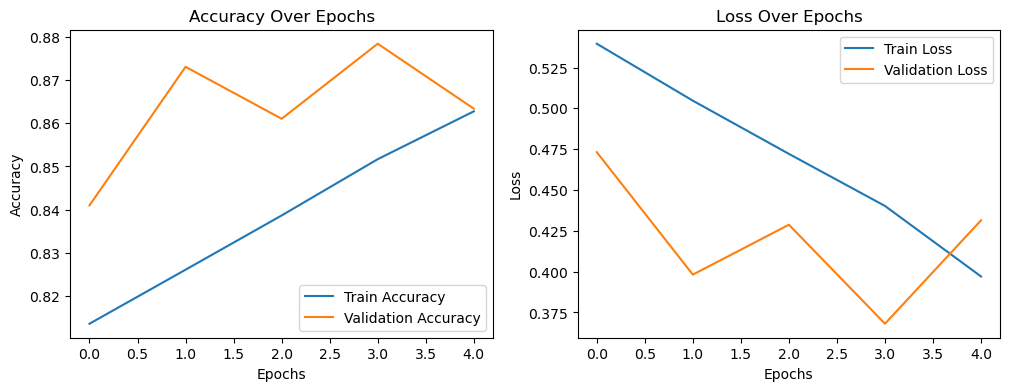

188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step
Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.90      0.86      0.88       567
              Forest       0.92      0.98      0.95       612
HerbaceousVegetation       0.82      0.78      0.80       609
             Highway       0.88      0.72      0.79       629
          Industrial       0.89      0.80      0.85       605
             Pasture       0.97      0.87      0.92       606
       PermanentCrop       0.80      0.78      0.79       565
         Residential       0.67      1.00      0.80       595
               River       0.89      0.87      0.88       594
             SeaLake       0.97      0.94      0.96       618

            accuracy                           0.86      6000
           macro avg       0.87      0.86      0.86      6000
        weighted avg       0.87      0.86      0.86      6000



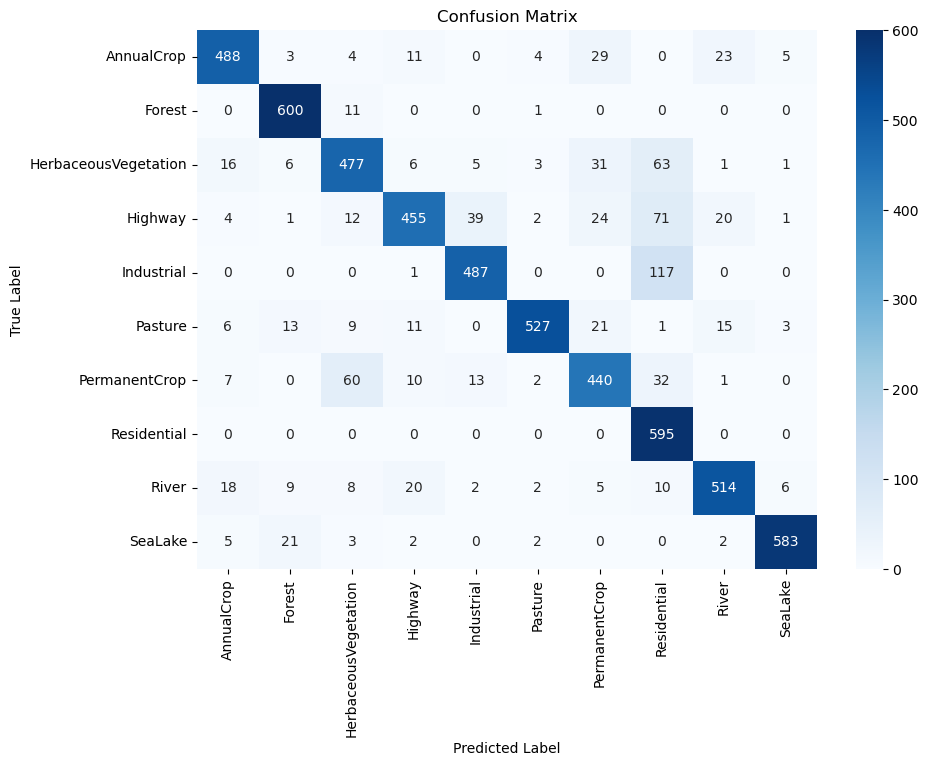

Precision: 0.8721
Recall: 0.8610
F1 Score: 0.8617


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Define constants
IMAGE_SIZE = (64, 64)  
BATCH_SIZE = 32
NUM_CLASSES = 10  

# Function to create the CNN model
def create_model(learning_rate=0.001, dropout_rate=0.5, filters=32):
    model = Sequential([
        Conv2D(filters, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        MaxPooling2D((2, 2)),
        
        Conv2D(filters*2, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        Conv2D(filters*4, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.0001, 0.001],
    'dropout_rate': [0.3, 0.5],
    'filters': [32, 64]
}

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)
test_generator = validation_datagen.flow(X_test, y_test, batch_size=BATCH_SIZE, shuffle=False)

# Manual Grid Search
best_accuracy = 0
best_params = None
best_model = None

for lr in param_grid['learning_rate']:
    for dr in param_grid['dropout_rate']:
        for f in param_grid['filters']:
            print(f"Training model with learning_rate={lr}, dropout_rate={dr}, filters={f}")
            
            model = create_model(learning_rate=lr, dropout_rate=dr, filters=f)
            
            history = model.fit(
                train_generator,
                validation_data=validation_generator,
                epochs=5,
                batch_size=BATCH_SIZE,
                verbose=1
            )
            
            # Evaluate the model on validation data
            val_loss, val_accuracy = model.evaluate(validation_generator, verbose=0)
            print(f"Validation Accuracy: {val_accuracy:.4f}")
            
            # Update best model if current model is better
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_params = {'learning_rate': lr, 'dropout_rate': dr, 'filters': f}
                best_model = model

print(f"Best Parameters: {best_params}")

# Train the best model
history = best_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    batch_size=BATCH_SIZE
)

# Plot training and validation metrics
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predict on the test set
y_pred = best_model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test  # Use original y_test labels

# Compute classification report
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
               'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, and F1-score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


## Model 3 - Enhanced CNN with Residual Connections

I set up and trained a Residual CNN model using TensorFlow and Keras for image classification. First, I imported the necessary libraries and defined constants such as image size, batch size, and the number of classes. I then defined a residual block, which adds shortcut connections to help the model learn better. Using this block, I created the DeepSat model with multiple convolutional layers, max-pooling layers, and residual connections. The model also includes global average pooling and dense layers with dropout for regularization.

I compiled the model with the Adam optimizer and a low learning rate, and set up data generators for training and validation, including data augmentation to improve generalization. To address class imbalance, I computed class weights and used them during training. I also set up callbacks for early stopping and learning rate reduction.

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)   │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_133 (Conv2D)           │ (None, 64, 64, 32)        │             896 │ input_layer_32[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_79              │ (None, 32, 32, 32)        │               0 │ conv2d_133[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_134 (Conv2D)           │ (None, 32, 32, 64)        │          18,496 │ max_pooling2d_79[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_54 (Activation)    │ (None, 32, 32, 64)        │               0 │ conv2d_134[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_135 (Conv2D)           │ (None, 32, 32, 64)        │          36,928 │ activation_54[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_136 (Conv2D)           │ (None, 32, 32, 64)        │           2,112 │ max_pooling2d_79[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_27 (Add)                  │ (None, 32, 32, 64)        │               0 │ conv2d_135[0][0],          │
│                               │                           │                 │ conv2d_136[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_55 (Activation)    │ (None, 32, 32, 64)        │               0 │ add_27[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_80              │ (None, 16, 16, 64)        │               0 │ activation_55[0][0]        │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_137 (Conv2D)           │ (None, 16, 16, 128)       │          73,856 │ max_pooling2d_80[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_56 (Activation)    │ (None, 16, 16, 128)       │               0 │ conv2d_137[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_138 (Conv2D)           │ (None, 16, 16, 128)       │         147,584 │ activation_56[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_139 (Conv2D)           │ (None, 16, 16, 128)       │           8,320 │ max_pooling2d_80[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_28 (Add)                  │ (None, 16, 16, 128)       │               0 │ conv2d_138[0][0],          │
│                               │                           │                 │ conv2d_139[0][0]           │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,343,178 (5.12 MB)

 Trainable params: 1,343,178 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
   1/1313 ━━━━━━━━━━━━━━━━━━━━ 1:59:32 5s/step - accuracy: 0.0000e+00 - loss: 2.3014

C:\Users\varsh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 97s 70ms/step - accuracy: 0.2105 - loss: 1.9910 - val_accuracy: 0.3190 - val_loss: 1.7314 - learning_rate: 1.0000e-04
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 88s 67ms/step - accuracy: 0.3155 - loss: 1.7258 - val_accuracy: 0.4863 - val_loss: 1.3790 - learning_rate: 1.0000e-04
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 101s 77ms/step - accuracy: 0.4678 - loss: 1.4236 - val_accuracy: 0.5347 - val_loss: 1.3247 - learning_rate: 1.0000e-04
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 113s 86ms/step - accuracy: 0.5477 - loss: 1.2491 - val_accuracy: 0.5487 - val_loss: 1.2572 - learning_rate: 1.0000e-04
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 204s 155ms/step - accuracy: 0.6028 - loss: 1.0959 - val_accuracy: 0.6757 - val_loss: 0.8992 - learning_rate: 1.0000e-04


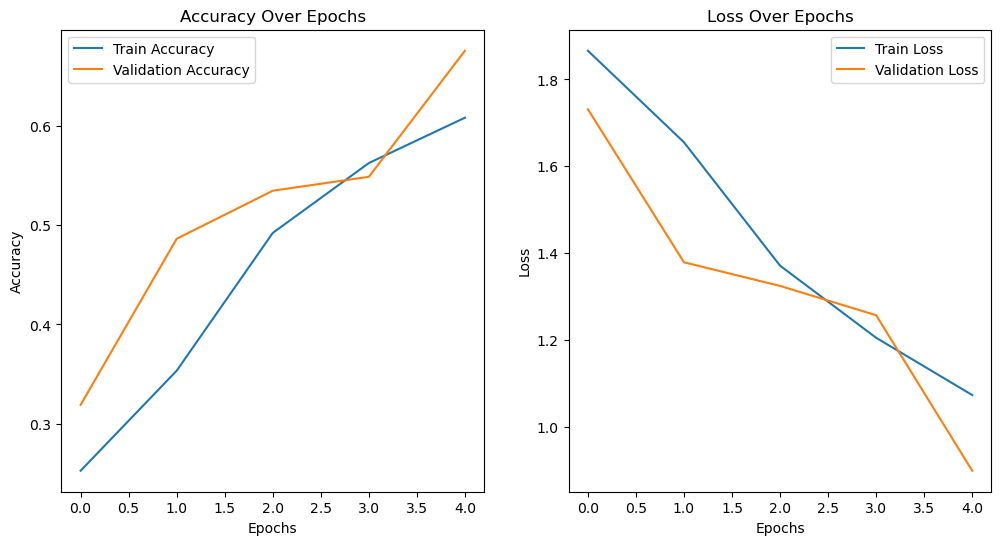

375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step
Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.69      0.75      0.72       567
              Forest       0.80      0.80      0.80       612
HerbaceousVegetation       0.63      0.44      0.52       609
             Highway       0.41      0.37      0.39       629
          Industrial       0.88      0.92      0.89       605
             Pasture       0.62      0.65      0.64       606
       PermanentCrop       0.48      0.52      0.50       565
         Residential       0.79      0.85      0.82       595
               River       0.52      0.63      0.57       594
             SeaLake       0.90      0.80      0.85       618

            accuracy                           0.67      6000
           macro avg       0.67      0.67      0.67      6000
        weighted avg       0.67      0.67      0.67      6000



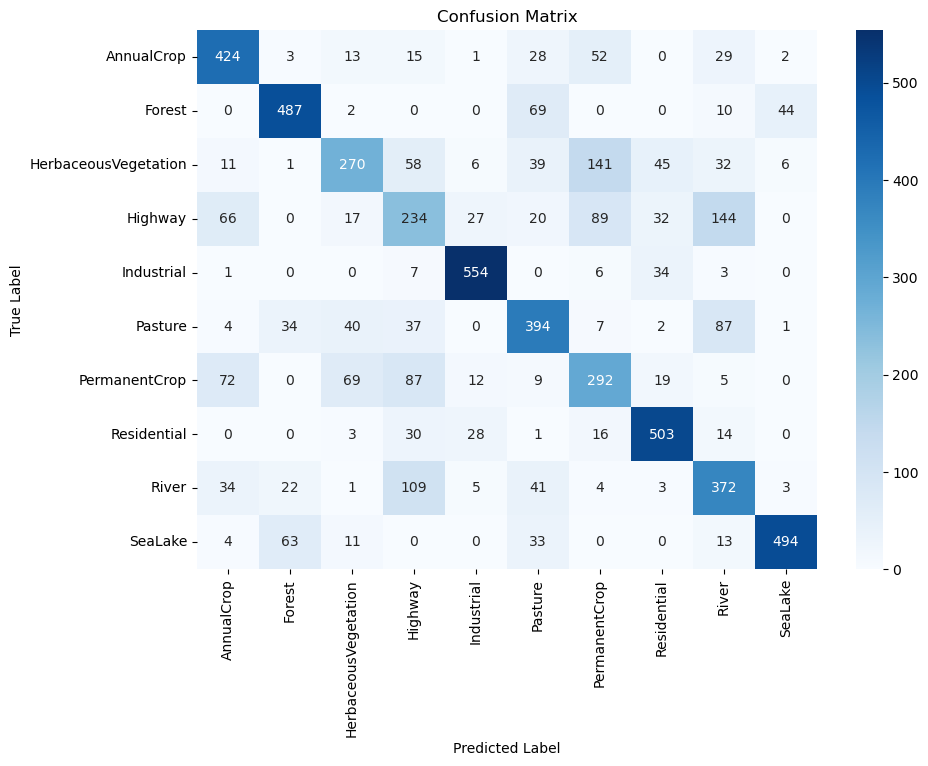

Precision: 0.6723
Recall: 0.6707
F1 Score: 0.6686
Accuracy: 0.6707


In [70]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Input, Dropout, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define constants
IMAGE_SIZE = (64, 64)  # Image size for input
BATCH_SIZE = 16
NUM_CLASSES = 10  # Number of classes

# Define a Residual Block
def residual_block(x, filters, kernel_size=(3, 3), strides=(1, 1), activation='relu'):
    # Shortcut path
    shortcut = x
    
    # Convolutional layers with residual connection
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    x = tf.keras.layers.Activation(activation)(x)
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    
    # Match dimensions if they differ
    if x.shape[-1] != shortcut.shape[-1]:
        shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
    
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation(activation)(x)
    return x

# Define DeepSat model with Residual Blocks
def create_deepsat_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # First convolutional block
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = residual_block(x, 64)
    x = MaxPooling2D((2, 2))(x)
    x = residual_block(x, 128)
    x = MaxPooling2D((2, 2))(x)
    x = residual_block(x, 256)
    x = MaxPooling2D((2, 2))(x)

    # Global Average Pooling and Dense layers
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)  # Dropout for regularization
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Create DeepSat model
model = create_deepsat_model(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), num_classes=NUM_CLASSES)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adjust learning rate as needed
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize pixel values to [0, 1]
)

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are already defined
train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)
test_generator = validation_datagen.flow(X_test, y_test, batch_size=BATCH_SIZE, shuffle=False)

# Compute class weights to handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train), 
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,  # Increased number of epochs for better training
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights
)

# Plot training and validation metrics
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy graph
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss graph
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)
# Predict on the test set
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test  # Use original y_test labels

# Compute classification report
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
               'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, F1-score, and accuracy
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


## Model 4 - Transfer Learning - ResNet 50 Model and Fine Tuning

This model uses a pre-trained ResNet50 network, which is known for its powerful feature extraction capabilities, particularly in handling image data. I used the ResNet50 model, initially trained on a large dataset, without its top classification layers and fine-tuned it to adapt to a new set of classes specific to my problem. I added custom layers on top of ResNet50: a Global Average Pooling layer that reduces the dimensionality of the feature maps and two Dense layers for final classification. The model is trained on augmented image data to improve its robustness and generalization.

During training, I monitored the model's performance with accuracy and loss metrics and used callbacks like EarlyStopping and ReduceLROnPlateau to adjust training dynamically, preventing overfitting and ensuring optimal learning. 

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2, 2, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_11          │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 24,061,706 (91.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/10


C:\Users\varsh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


657/657 ━━━━━━━━━━━━━━━━━━━━ 371s 515ms/step - accuracy: 0.7551 - loss: 0.7687 - val_accuracy: 0.5830 - val_loss: 1.5197 - learning_rate: 1.0000e-04
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 337s 512ms/step - accuracy: 0.9188 - loss: 0.2514 - val_accuracy: 0.9453 - val_loss: 0.1715 - learning_rate: 1.0000e-04
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 336s 511ms/step - accuracy: 0.9331 - loss: 0.2001 - val_accuracy: 0.9540 - val_loss: 0.1417 - learning_rate: 1.0000e-04
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 336s 511ms/step - accuracy: 0.9466 - loss: 0.1570 - val_accuracy: 0.9543 - val_loss: 0.1492 - learning_rate: 1.0000e-04
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 342s 520ms/step - accuracy: 0.9528 - loss: 0.1408 - val_accuracy: 0.9473 - val_loss: 0.1745 - learning_rate: 1.0000e-04
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 347s 528ms/step - accuracy: 0.9569 - loss: 0.1253 - val_accuracy: 0.9437 - val_loss: 0.1859 - learning_rate: 1.0000e-04
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 337s 513ms/

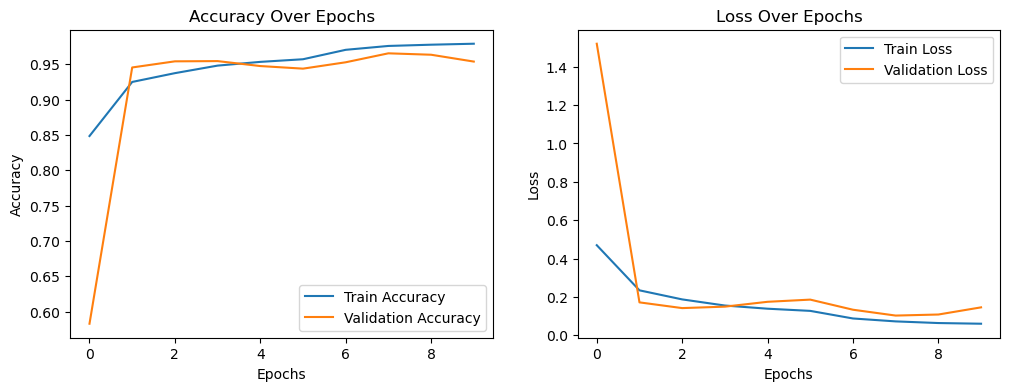

188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 126ms/step
Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.99      0.92      0.96       567
              Forest       0.94      1.00      0.97       612
HerbaceousVegetation       0.98      0.93      0.95       609
             Highway       0.98      0.96      0.97       629
          Industrial       0.99      0.93      0.96       605
             Pasture       0.98      0.97      0.98       606
       PermanentCrop       0.91      0.98      0.94       565
         Residential       0.92      1.00      0.96       595
               River       0.97      0.98      0.97       594
             SeaLake       1.00      0.97      0.99       618

            accuracy                           0.96      6000
           macro avg       0.97      0.96      0.96      6000
        weighted avg       0.97      0.96      0.96      6000



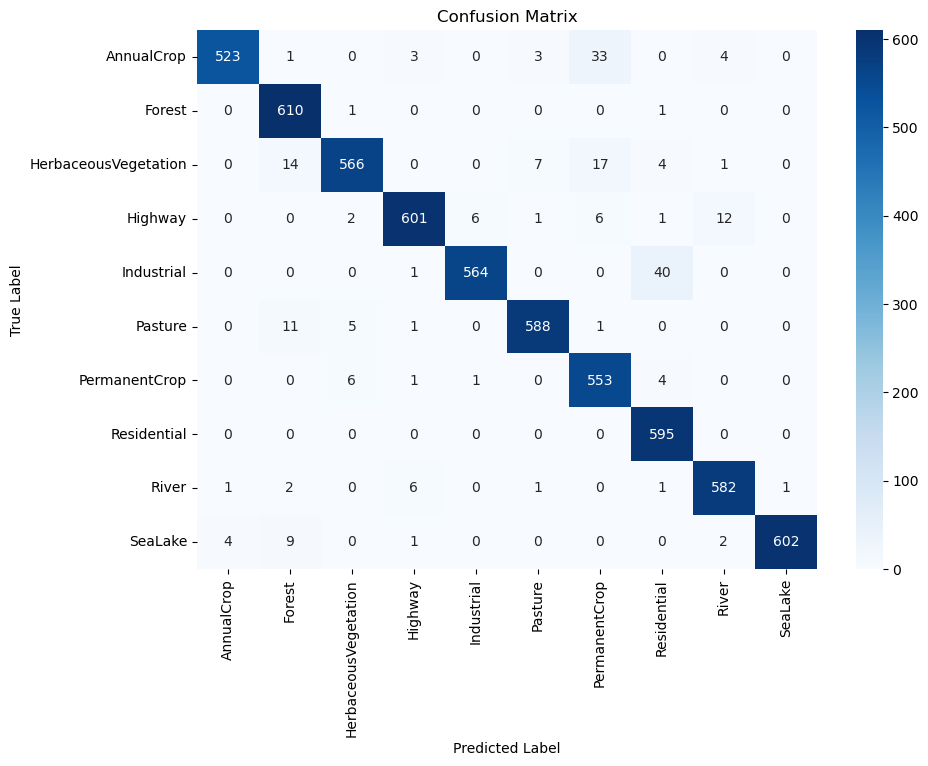

Precision: 0.9654
Recall: 0.9640
F1 Score: 0.9641
Accuracy: 0.9640


In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define constants
IMAGE_SIZE = (64, 64) 
BATCH_SIZE = 32
NUM_CLASSES = 10

# Load the pre-trained ResNet50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Create the model
inputs = Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Define data generators
train_datagen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator()

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are already defined
train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)
test_generator = validation_datagen.flow(X_test, y_test, batch_size=BATCH_SIZE, shuffle=False)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Increase number of epochs
    callbacks=[early_stopping, reduce_lr]
)

# Plot training and validation accuracy and loss
def plot_training_history(history):
    # Accuracy graph
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Predict on the test set
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test  # Use original y_test labels

# Compute classification report
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
               'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, F1-score, and accuracy
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


## Model 5 - Transfer Learning - DenseNet121 Model and Finetuning

The model setup involves using DenseNet121, pre-trained on ImageNet, as the base model with a custom classifier added on top. This custom classifier includes a global average pooling layer, a dense layer with 256 units, and a final dense layer for 10 classes. The model is compiled using the Adam optimizer with a low learning rate to facilitate fine-tuning. For data preparation, training images undergo data augmentation with techniques such as rotation, shifts, shear, zoom, and flipping, while validation and test data remain unaltered. The model is trained for 10 epochs with callbacks for early stopping and learning rate reduction. Evaluation includes predicting classes on the test set, calculating performance metrics like precision, recall, F1-score, and accuracy, and plotting a confusion matrix to visualize the prediction results. In summary, this approach fine-tunes a pre-trained DenseNet121 on the dataset and assesses its performance through standard metrics and visualizations.

Model: "functional_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_87 (InputLayer)   │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_14             │ (None, 70, 70, 3)         │               0 │ input_layer_87[0][0]       │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,408 │ zero_padding2d_14[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 32, 32, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 32, 32, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_15             │ (None, 34, 34, 64)        │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 16, 16, 64)        │               0 │ zero_padding2d_15[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 16, 16, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 16, 16, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,302,474 (27.86 MB)

 Trainable params: 7,218,826 (27.54 MB)

 Non-trainable params: 83,648 (326.75 KB)

Epoch 1/10


C:\Users\varsh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


657/657 ━━━━━━━━━━━━━━━━━━━━ 562s 734ms/step - accuracy: 0.6265 - loss: 1.1643 - val_accuracy: 0.9020 - val_loss: 0.2946 - learning_rate: 5.0000e-05
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 483s 734ms/step - accuracy: 0.9106 - loss: 0.2772 - val_accuracy: 0.9193 - val_loss: 0.2207 - learning_rate: 5.0000e-05
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 459s 699ms/step - accuracy: 0.9310 - loss: 0.2046 - val_accuracy: 0.9127 - val_loss: 0.2441 - learning_rate: 5.0000e-05
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 461s 702ms/step - accuracy: 0.9422 - loss: 0.1738 - val_accuracy: 0.9187 - val_loss: 0.2339 - learning_rate: 5.0000e-05
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 465s 707ms/step - accuracy: 0.9504 - loss: 0.1472 - val_accuracy: 0.9510 - val_loss: 0.1405 - learning_rate: 5.0000e-05
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 469s 714ms/step - accuracy: 0.9556 - loss: 0.1339 - val_accuracy: 0.9153 - val_loss: 0.2847 - learning_rate: 5.0000e-05
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 467s 710ms/

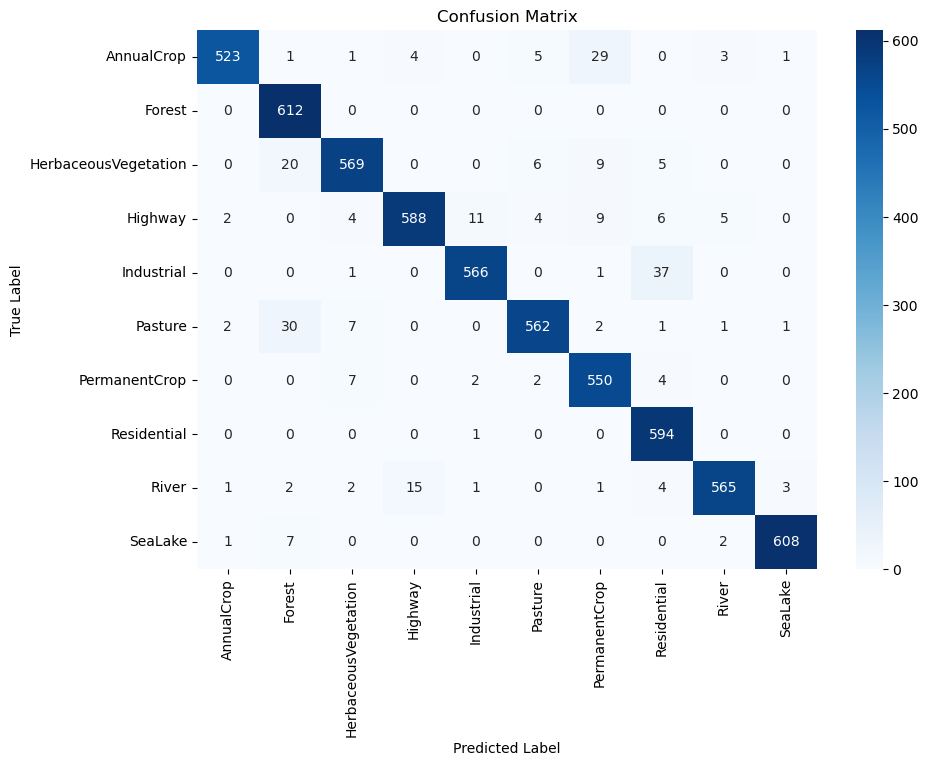

Precision: 0.9578
Recall: 0.9562
F1 Score: 0.9562
Accuracy: 0.9562


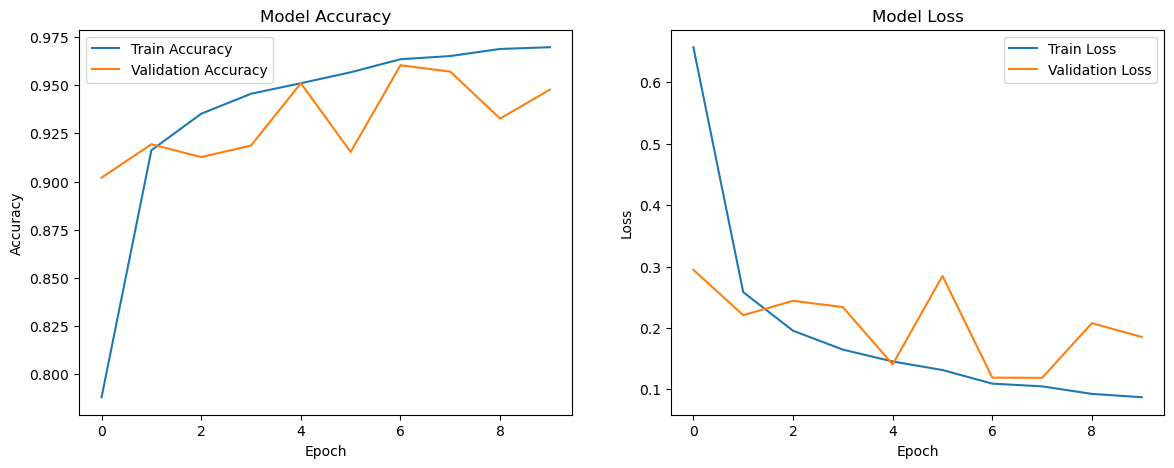

In [102]:
#densenet121 moveup
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define constants
IMAGE_SIZE = (64, 64) 
BATCH_SIZE = 32
NUM_CLASSES = 10  

# Load the pre-trained DenseNet121 model without the top layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Create the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),  # Adjust learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Define data generators
train_datagen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator()

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are already defined
train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)
test_generator = validation_datagen.flow(X_test, y_test, batch_size=BATCH_SIZE, shuffle=False)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Predict on the test set
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test  # Use original y_test labels

# Compute classification report
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
               'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, F1-score, and accuracy
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Model 6 - Transfer Learning DenseNet121 Model with Further FineTuning

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_2              │ (None, 70, 70, 3)         │               0 │ input_layer_9[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,408 │ zero_padding2d_2[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 32, 32, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 32, 32, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_3              │ (None, 34, 34, 64)        │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 16, 16, 64)        │               0 │ zero_padding2d_3[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 16, 16, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 16, 16, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,302,474 (27.86 MB)

 Trainable params: 7,218,826 (27.54 MB)

 Non-trainable params: 83,648 (326.75 KB)

Epoch 1/10


C:\Users\varsh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


657/657 ━━━━━━━━━━━━━━━━━━━━ 1251s 2s/step - accuracy: 0.7168 - loss: 0.8848 - val_accuracy: 0.9120 - val_loss: 0.2728 - learning_rate: 1.0000e-04
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 264s 402ms/step - accuracy: 0.9185 - loss: 0.2394 - val_accuracy: 0.9340 - val_loss: 0.2045 - learning_rate: 1.0000e-04
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 301s 459ms/step - accuracy: 0.9403 - loss: 0.1817 - val_accuracy: 0.8820 - val_loss: 0.4292 - learning_rate: 1.0000e-04
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 305s 464ms/step - accuracy: 0.9527 - loss: 0.1479 - val_accuracy: 0.9403 - val_loss: 0.1949 - learning_rate: 1.0000e-04
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 311s 473ms/step - accuracy: 0.9548 - loss: 0.1346 - val_accuracy: 0.9607 - val_loss: 0.1333 - learning_rate: 1.0000e-04
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 302s 459ms/step - accuracy: 0.9533 - loss: 0.1341 - val_accuracy: 0.9610 - val_loss: 0.1191 - learning_rate: 1.0000e-04
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 302s 460ms/st

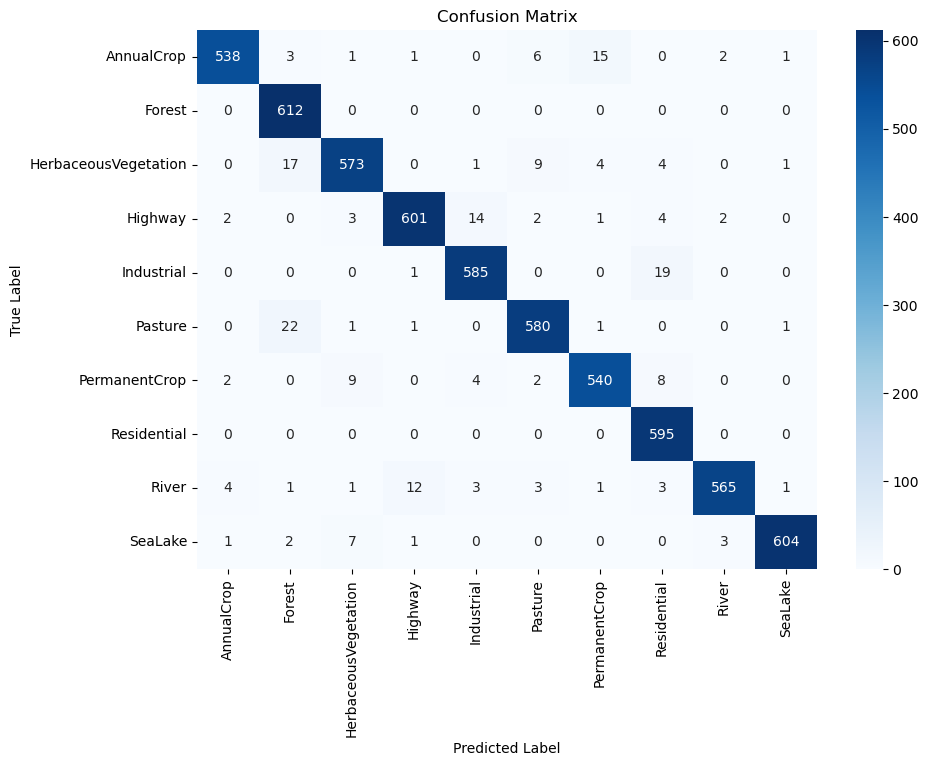

Precision: 0.9661
Recall: 0.9655
F1 Score: 0.9655
Accuracy: 0.9655


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define constants
IMAGE_SIZE = (64, 64) 
BATCH_SIZE = 32
NUM_CLASSES = 10  

# Load the pre-trained DenseNet121 model without the top layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Create the model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Define data generators
train_datagen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator()

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are already defined
train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)
test_generator = validation_datagen.flow(X_test, y_test, batch_size=BATCH_SIZE, shuffle=False)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Increase number of epochs
    callbacks=[early_stopping, reduce_lr]
)

# Predict on the test set
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test  # Use original y_test labels

# Compute classification report
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
               'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, F1-score, and accuracy
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


## Model 7 - Transfer Learning with Fine-Tuning Using VGG16

This model employs transfer learning with fine-tuning using the pre-trained VGG16 architecture. The base model, VGG16, is loaded with weights trained on ImageNet, but without the top classification layers. The final few layers of VGG16 are unfrozen to enable fine-tuning, allowing these layers to adapt to the new dataset. A custom classifier is added on top of the base model, consisting of a Global Average Pooling layer, a Dense layer with 256 units and ReLU activation, followed by a final Dense layer for classification into 10 classes. The model is compiled using the Adam optimizer with a low learning rate to support fine-tuning and is trained for 10 epochs with early stopping and learning rate reduction callbacks. Evaluation involves generating predictions on the test set and calculating metrics such as precision, recall, F1-score, and accuracy, along with plotting a confusion matrix to visualize performance.









Model: "functional_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_85 (InputLayer)          │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_52          │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 256)                 │         131,3

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 14,848,586 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 455s 687ms/step - accuracy: 0.7359 - loss: 0.7660 - val_accuracy: 0.8567 - val_loss: 0.5316 - learning_rate: 1.0000e-04
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 457s 696ms/step - accuracy: 0.9109 - loss: 0.2744 - val_accuracy: 0.9170 - val_loss: 0.2794 - learning_rate: 1.0000e-04
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 452s 687ms/step - accuracy: 0.9276 - loss: 0.2285 - val_accuracy: 0.9090 - val_loss: 0.3028 - learning_rate: 1.0000e-04
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 466s 709ms/step - accuracy: 0.9421 - loss: 0.1793 - val_accuracy: 0.9297 - val_loss: 0.2259 - learning_rate: 1.0000e-04
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 451s 687ms/step - accuracy: 0.9424 - loss: 0.1820 - val_accuracy: 0.9460 - val_loss: 0.1763 - learning_rate: 1.0000e-04


C:\Users\varsh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step
Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.96      0.91      0.93       567
              Forest       0.93      1.00      0.96       612
HerbaceousVegetation       0.95      0.94      0.94       609
             Highway       0.93      0.99      0.96       629
          Industrial       0.99      0.89      0.94       605
             Pasture       0.94      0.97      0.96       606
       PermanentCrop       0.92      0.92      0.92       565
         Residential       0.87      1.00      0.93       595
               River       0.96      0.93      0.94       594
             SeaLake       1.00      0.88      0.93       618

            accuracy                           0.94      6000
           macro avg       0.95      0.94      0.94      6000
        weighted avg       0.95      0.94      0.94      6000



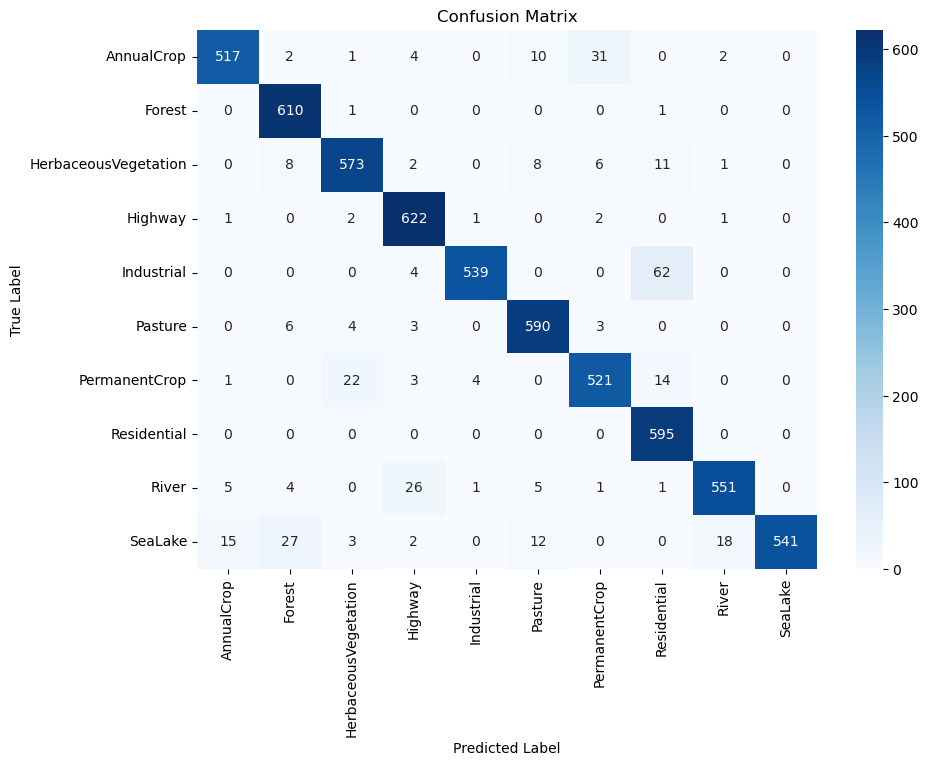

Precision: 0.9457
Recall: 0.9432
F1 Score: 0.9430
Accuracy: 0.9432


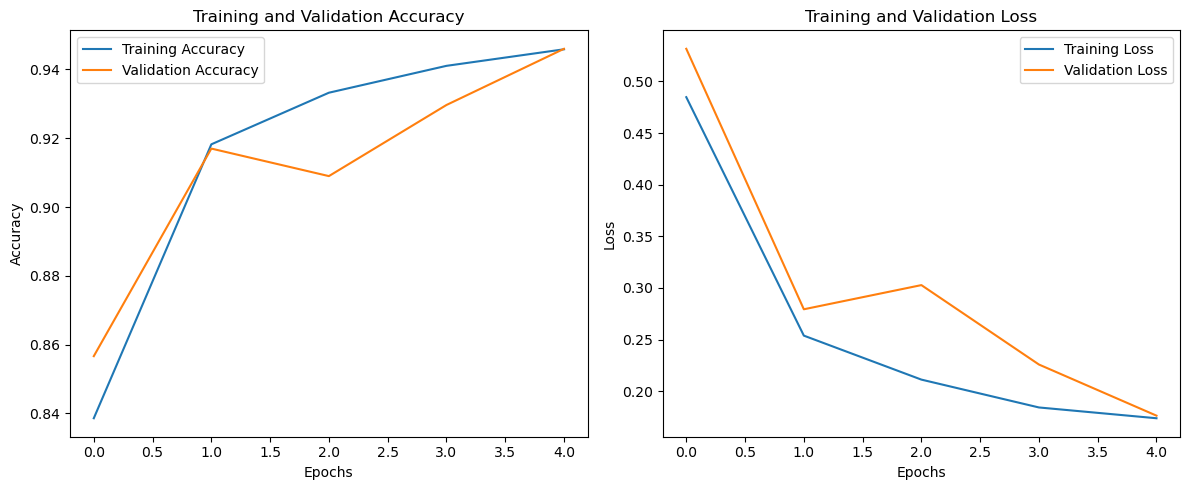

In [100]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define constants
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32
NUM_CLASSES = 10  

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-5:]:
    layer.trainable = True

# Create the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5, 
    callbacks=[early_stopping, reduce_lr]
)

# Predict on the test set
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test  # Use original y_test labels

# Compute classification report
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
               'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, F1-score, and accuracy
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model 8 - Transfer Learning with Fine-Tuning Using VGG19

This model utilizes transfer learning with fine-tuning based on the pre-trained VGG19 architecture. The VGG19 model is initially loaded with weights from ImageNet, excluding its top classification layers. For fine-tuning, the last few layers of the base VGG19 model are unfrozen, allowing them to adjust to the new dataset. A custom classifier is then added on top of the base model, comprising a Global Average Pooling layer, a Dense layer with 256 units and ReLU activation, and a final Dense layer for classification into 10 distinct classes. The model is compiled using the Adam optimizer with a low learning rate to facilitate fine-tuning and is trained for 10 epochs, incorporating early stopping and learning rate reduction callbacks. The model’s performance is evaluated by generating predictions on the test set, and metrics such as precision, recall, F1-score, and accuracy are computed. A confusion matrix is also plotted to visualize the prediction results.

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,158,282 (76.90 MB)

 Trainable params: 20,158,282 (76.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 589s 890ms/step - accuracy: 0.6641 - loss: 0.9483 - val_accuracy: 0.8773 - val_loss: 0.3909 - learning_rate: 1.0000e-04
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 598s 909ms/step - accuracy: 0.9015 - loss: 0.3265 - val_accuracy: 0.9220 - val_loss: 0.2523 - learning_rate: 1.0000e-04
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 29412s 45s/step - accuracy: 0.9216 - loss: 0.2631 - val_accuracy: 0.9233 - val_loss: 0.2598 - learning_rate: 1.0000e-04
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 572s 870ms/step - accuracy: 0.9275 - loss: 0.2461 - val_accuracy: 0.9503 - val_loss: 0.1487 - learning_rate: 1.0000e-04
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 606s 922ms/step - accuracy: 0.9389 - loss: 0.2018 - val_accuracy: 0.9483 - val_loss: 0.1637 - learning_rate: 1.0000e-04
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 671s 1s/step - accuracy: 0.9429 - loss: 0.1874 - val_accuracy: 0.9443 - val_loss: 0.1955 - learning_rate: 1.0000e-04
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 690

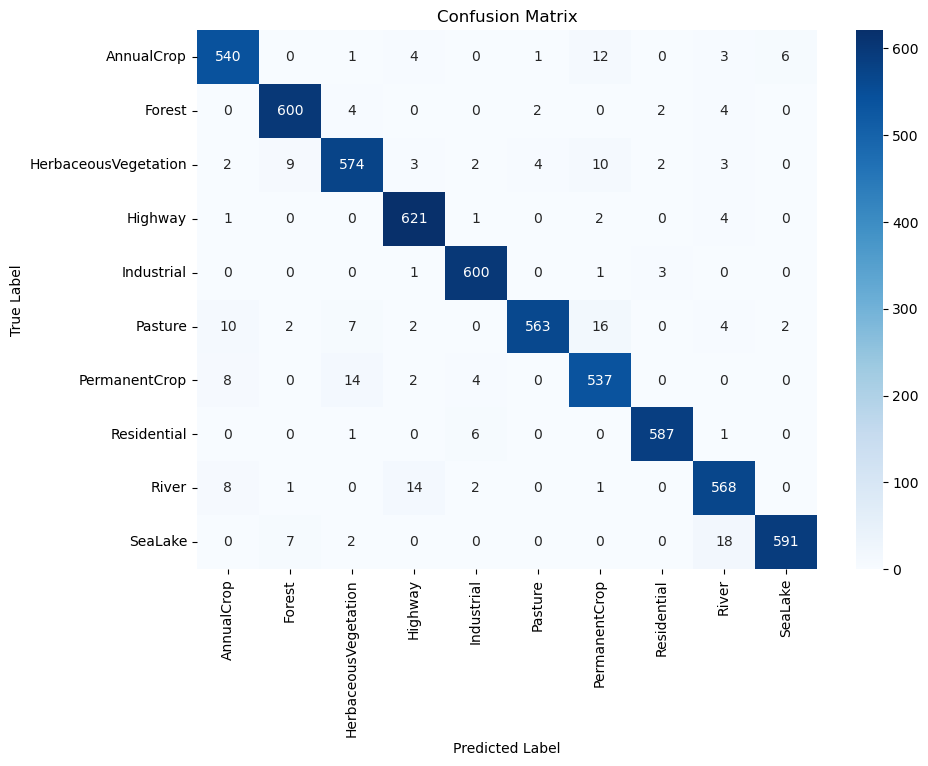

Precision: 0.9638
Recall: 0.9635
F1 Score: 0.9635
Accuracy: 0.9635


In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define constants
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32
NUM_CLASSES = 10  

# Load the pre-trained VGG19 model without the top layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Create the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Increase number of epochs as needed
    callbacks=[early_stopping, reduce_lr]
)

# Predict on the test set
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test  # Use original y_test labels

# Compute classification report
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
               'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, F1-score, and accuracy
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


## Model 9 - Transfer Learning with Fine-Tuning Using EfficientNetB0

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 2, 2, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,380,077 (16.71 MB)

 Trainable params: 4,338,054 (16.55 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 382s 491ms/step - accuracy: 0.6181 - loss: 1.1623 - val_accuracy: 0.3630 - val_loss: 4.6149 - learning_rate: 1.0000e-04
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 299s 455ms/step - accuracy: 0.8883 - loss: 0.3380 - val_accuracy: 0.9063 - val_loss: 0.2897 - learning_rate: 1.0000e-04
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 307s 466ms/step - accuracy: 0.9155 - loss: 0.2549 - val_accuracy: 0.9193 - val_loss: 0.2344 - learning_rate: 1.0000e-04
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 295s 449ms/step - accuracy: 0.9245 - loss: 0.2140 - val_accuracy: 0.9213 - val_loss: 0.2262 - learning_rate: 1.0000e-04
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 293s 446ms/step - accuracy: 0.9395 - loss: 0.1785 - val_accuracy: 0.9387 - val_loss: 0.1814 - learning_rate: 1.0000e-04
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 286s 435ms/step - accuracy: 0.9435 - loss: 0.1664 - val_accuracy: 0.9070 - val_loss: 0.2868 - learning_rate: 1.0000e-04
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 

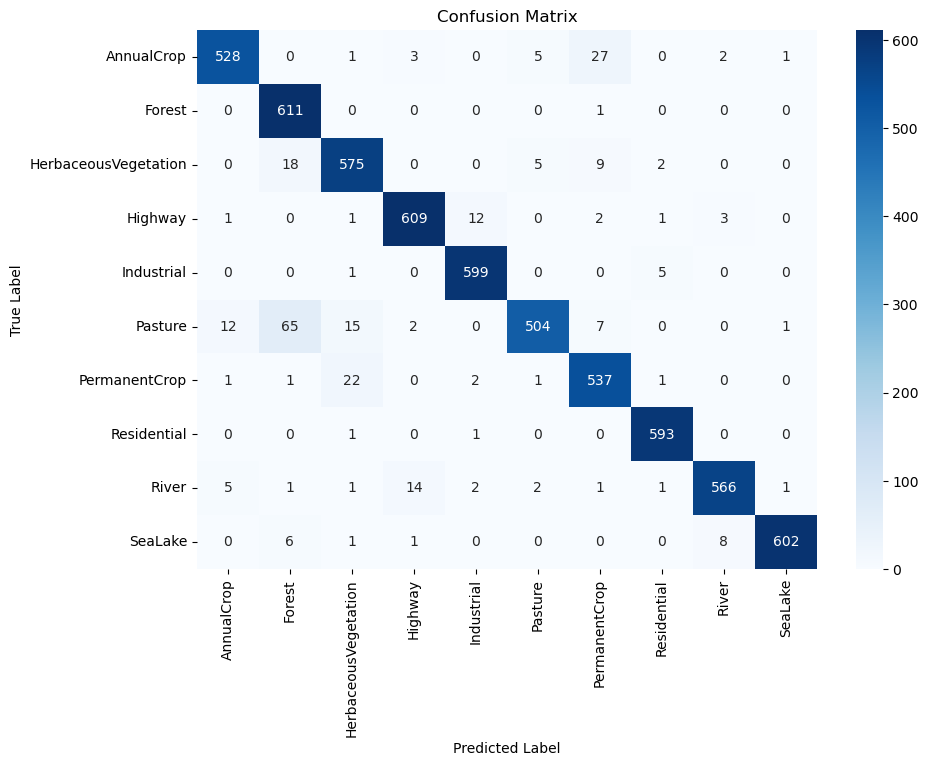

Precision: 0.9558
Recall: 0.9540
F1 Score: 0.9538
Accuracy: 0.9540


In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define constants
IMAGE_SIZE = (64, 64)  # Increase image size for better feature extraction
BATCH_SIZE = 32
NUM_CLASSES = 10  

# Load the pre-trained EfficientNetB0 model without the top layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Create the model
inputs = Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Define data generators
train_datagen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator()

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are already defined
train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=BATCH_SIZE)
test_generator = validation_datagen.flow(X_test, y_test, batch_size=BATCH_SIZE, shuffle=False)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Increase number of epochs
    callbacks=[early_stopping, reduce_lr]
)

# Predict on the test set
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test  # Use original y_test labels

# Compute classification report
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
               'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, F1-score, and accuracy
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


## Model 10 - Stacked Ensemble Model Using Pre-trained CNN Architectures (ResNet, VGG, DenseNet) with Logistic Regression Meta-Learner)


This architecture leverages a stacked ensemble approach that combines the strengths of multiple pre-trained convolutional neural networks (CNNs) to enhance image classification performance. Three well-established models—ResNet50, VGG16, and DenseNet121—are used as base learners, each pre-trained on the ImageNet dataset and fine-tuned on the target dataset. These models extract rich and diverse feature representations from the input images, resized to 64x64 dimensions. The outputs from these base models are aggregated and passed to a meta-learner, a Logistic Regression model, which learns to combine the predictions of the individual models to produce final ensemble predictions. This architecture ensures that the model captures the strengths of different architectures, potentially leading to improved generalization. The model is evaluated through various metrics, including accuracy, confusion matrix, and a detailed classification report, providing insights into the model’s performance across all classes. Additionally, the training history, as well as precision, recall, and F1-scores for each class, are visualized through detailed plots for better analysis.

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 379s 528ms/step - accuracy: 0.7522 - loss: 0.8784 - val_accuracy: 0.3650 - val_loss: 21.6000
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 362s 551ms/step - accuracy: 0.8913 - loss: 0.3388 - val_accuracy: 0.8242 - val_loss: 0.5566
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 374s 569ms/step - accuracy: 0.9150 - loss: 0.2563 - val_accuracy: 0.7822 - val_loss: 0.9966
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 399s 608ms/step - accuracy: 0.9348 - loss: 0.1955 - val_accuracy: 0.7420 - val_loss: 1.0295
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 386s 587ms/step - accuracy: 0.9416 - loss: 0.1785 - val_accuracy: 0.7272 - val_loss: 1.5358


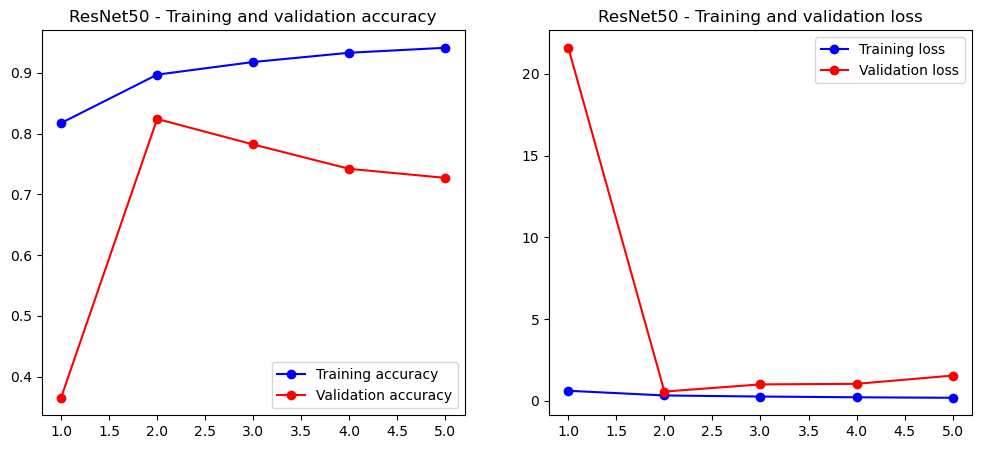

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 539s 811ms/step - accuracy: 0.3153 - loss: 2.0450 - val_accuracy: 0.4687 - val_loss: 1.2781
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 514s 783ms/step - accuracy: 0.4206 - loss: 1.4992 - val_accuracy: 0.3732 - val_loss: 1.6052
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 517s 787ms/step - accuracy: 0.4863 - loss: 1.3258 - val_accuracy: 0.6170 - val_loss: 1.0075
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 507s 772ms/step - accuracy: 0.6011 - loss: 1.0656 - val_accuracy: 0.6597 - val_loss: 0.9001
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 514s 782ms/step - accuracy: 0.6201 - loss: 1.0419 - val_accuracy: 0.6598 - val_loss: 0.9043


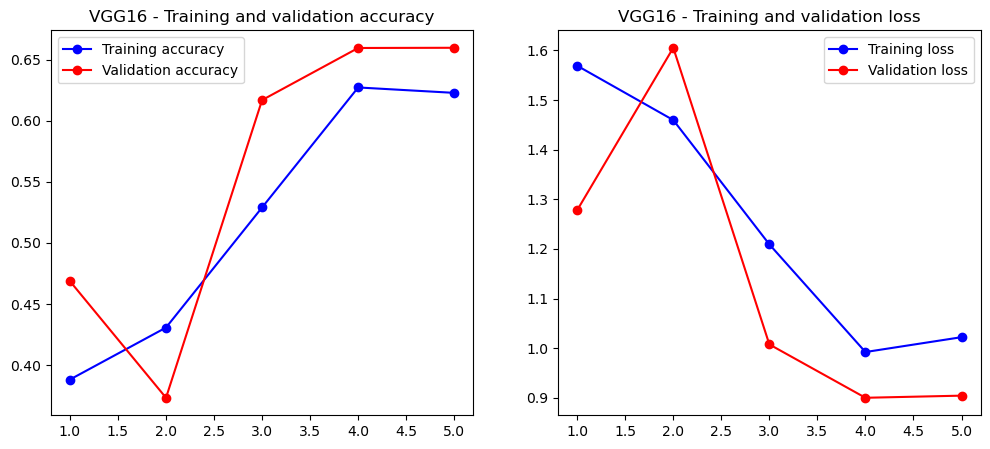

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 463s 592ms/step - accuracy: 0.7805 - loss: 0.7475 - val_accuracy: 0.7483 - val_loss: 1.0290
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 377s 574ms/step - accuracy: 0.9069 - loss: 0.2895 - val_accuracy: 0.7728 - val_loss: 0.7989
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 355s 540ms/step - accuracy: 0.9253 - loss: 0.2240 - val_accuracy: 0.7960 - val_loss: 0.6873
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 361s 550ms/step - accuracy: 0.9392 - loss: 0.1906 - val_accuracy: 0.9170 - val_loss: 0.2254
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 371s 565ms/step - accuracy: 0.9429 - loss: 0.1727 - val_accuracy: 0.8943 - val_loss: 0.3123


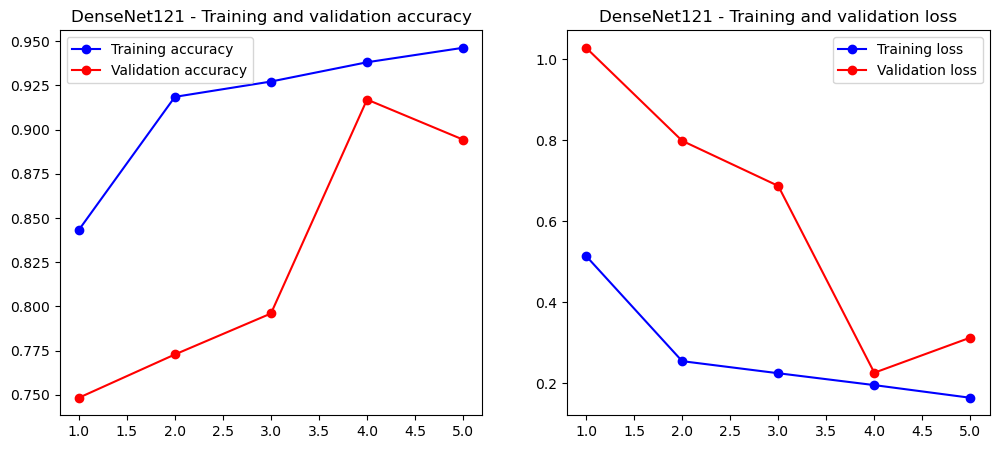

188/188 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 36s 189ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 34s 164ms/step


C:\Users\varsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Accuracy: 0.6123
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       567
           1       0.93      0.92      0.92       612
           2       0.56      0.52      0.54       609
           3       0.47      0.74      0.57       629
           4       0.94      0.16      0.28       605
           5       0.75      0.69      0.72       606
           6       0.49      0.46      0.47       565
           7       0.50      0.90      0.64       595
           8       0.31      0.01      0.03       594
           9       0.53      0.88      0.66       618

    accuracy                           0.61      6000
   macro avg       0.64      0.61      0.57      6000
weighted avg       0.64      0.61      0.57      6000



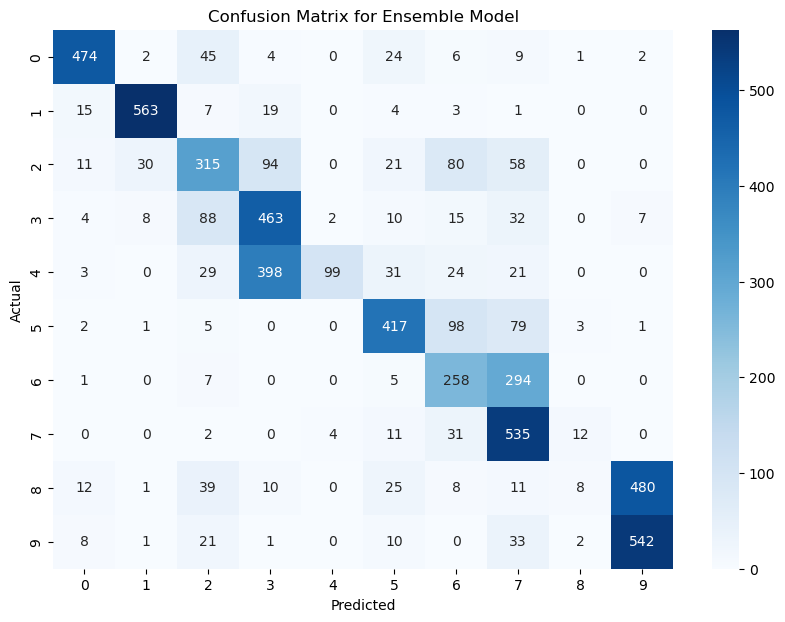

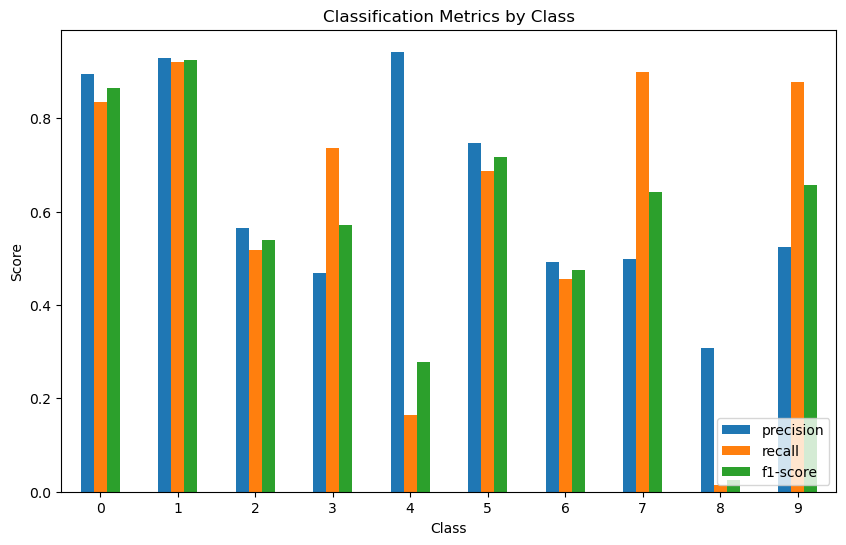

In [79]:
import numpy as np
from tensorflow.keras.applications import ResNet50, VGG16, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define constants
IMAGE_SIZE = (64, 64)
NUM_CLASSES = 10
EPOCHS = 5  # Train for only 5 epochs

# Function to create a base model with 64x64 input
def create_model(base, input_shape, num_classes):
    base_model = base(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to plot training history
def plot_training(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title(f'{title} - Training and validation accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title(f'{title} - Training and validation loss')
    plt.legend()

    plt.show()

# Create base learners with modified input size of 64x64
resnet_model = create_model(ResNet50, (IMAGE_SIZE[0], IMAGE_SIZE[1], 3), NUM_CLASSES)
vgg_model = create_model(VGG16, (IMAGE_SIZE[0], IMAGE_SIZE[1], 3), NUM_CLASSES)
densenet_model = create_model(DenseNet121, (IMAGE_SIZE[0], IMAGE_SIZE[1], 3), NUM_CLASSES)

# Train each model individually and plot training history (for 5 epochs)
history_resnet = resnet_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, y_test))
plot_training(history_resnet, 'ResNet50')

history_vgg = vgg_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, y_test))
plot_training(history_vgg, 'VGG16')

history_densenet = densenet_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, y_test))
plot_training(history_densenet, 'DenseNet121')

# Get predictions from each base model
resnet_preds = np.argmax(resnet_model.predict(X_test), axis=1)
vgg_preds = np.argmax(vgg_model.predict(X_test), axis=1)
densenet_preds = np.argmax(densenet_model.predict(X_test), axis=1)

# Stack predictions (input to the meta-learner)
stacked_predictions = np.stack([resnet_preds, vgg_preds, densenet_preds], axis=1)

# Train meta-learner (Logistic Regression in this case)
meta_learner = LogisticRegression()
meta_learner.fit(stacked_predictions, y_test)

# Test ensemble model
ensemble_preds = meta_learner.predict(stacked_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_preds)

print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")
print("Classification Report:")
report = classification_report(y_test, ensemble_preds, output_dict=True)
print(classification_report(y_test, ensemble_preds))

# Plot confusion matrix
cm = confusion_matrix(y_test, ensemble_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

# Create a bar chart for precision, recall, and F1-score for each class
def plot_classification_report(report):
    # Convert the classification report into a DataFrame
    df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'], axis=0)
    
    # Plot the bar chart
    df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
    plt.title('Classification Metrics by Class')
    plt.ylabel('Score')
    plt.xlabel('Class')
    plt.xticks(rotation=0)
    plt.legend(loc='lower right')
    plt.show()

# Plot the classification chart
plot_classification_report(report)


## Model 11 - Enhanced Ensemble CNN with Fine-Tuning and Regularization.

Epoch 1/2
657/657 ━━━━━━━━━━━━━━━━━━━━ 501s 670ms/step - accuracy: 0.7098 - loss: 0.9535 - val_accuracy: 0.5007 - val_loss: 2.4811
Epoch 2/2
657/657 ━━━━━━━━━━━━━━━━━━━━ 409s 622ms/step - accuracy: 0.9424 - loss: 0.1899 - val_accuracy: 0.9592 - val_loss: 0.1300


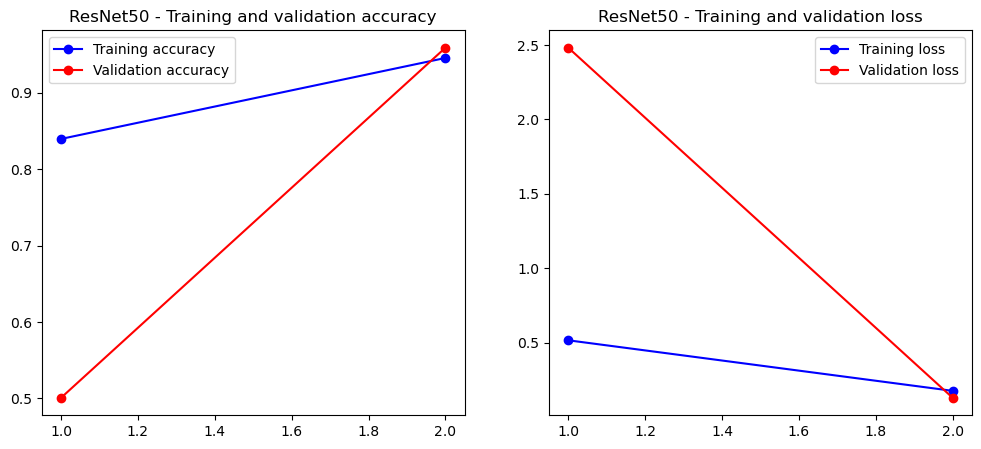

Epoch 1/2
657/657 ━━━━━━━━━━━━━━━━━━━━ 487s 733ms/step - accuracy: 0.7259 - loss: 0.8257 - val_accuracy: 0.9380 - val_loss: 0.1828
Epoch 2/2
657/657 ━━━━━━━━━━━━━━━━━━━━ 492s 748ms/step - accuracy: 0.9386 - loss: 0.2069 - val_accuracy: 0.9380 - val_loss: 0.1850


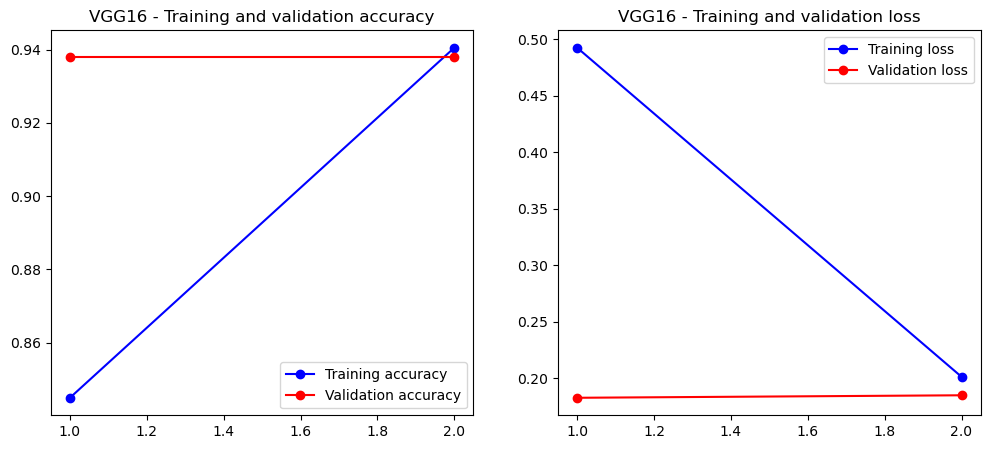

Epoch 1/2
657/657 ━━━━━━━━━━━━━━━━━━━━ 587s 719ms/step - accuracy: 0.6566 - loss: 1.1355 - val_accuracy: 0.9567 - val_loss: 0.1338
Epoch 2/2
657/657 ━━━━━━━━━━━━━━━━━━━━ 475s 723ms/step - accuracy: 0.9362 - loss: 0.2083 - val_accuracy: 0.9640 - val_loss: 0.1115


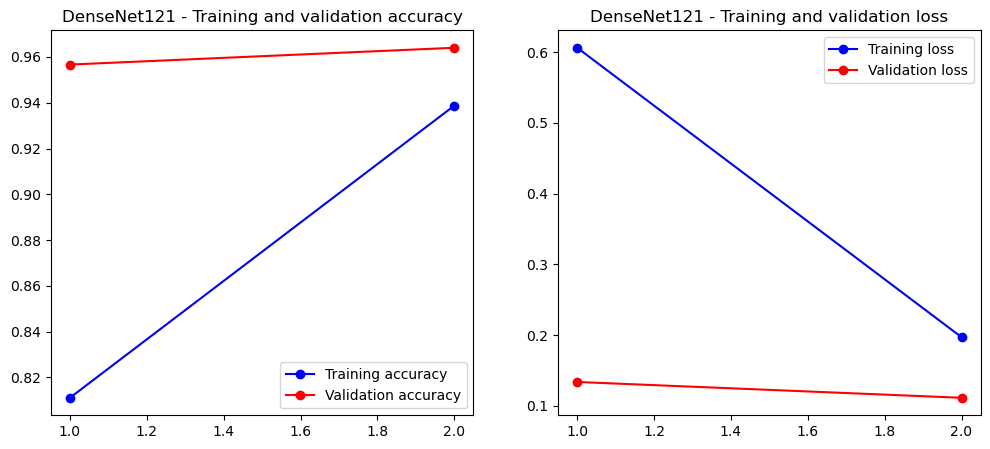

188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 225ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 225ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 56s 270ms/step


C:\Users\varsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Accuracy: 0.9382
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       567
           1       0.97      0.96      0.96       612
           2       0.94      0.92      0.93       609
           3       0.88      0.93      0.90       629
           4       0.90      0.94      0.92       605
           5       0.91      0.94      0.93       606
           6       0.88      0.88      0.88       565
           7       0.98      0.97      0.97       595
           8       0.98      0.92      0.95       594
           9       0.97      0.99      0.98       618

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



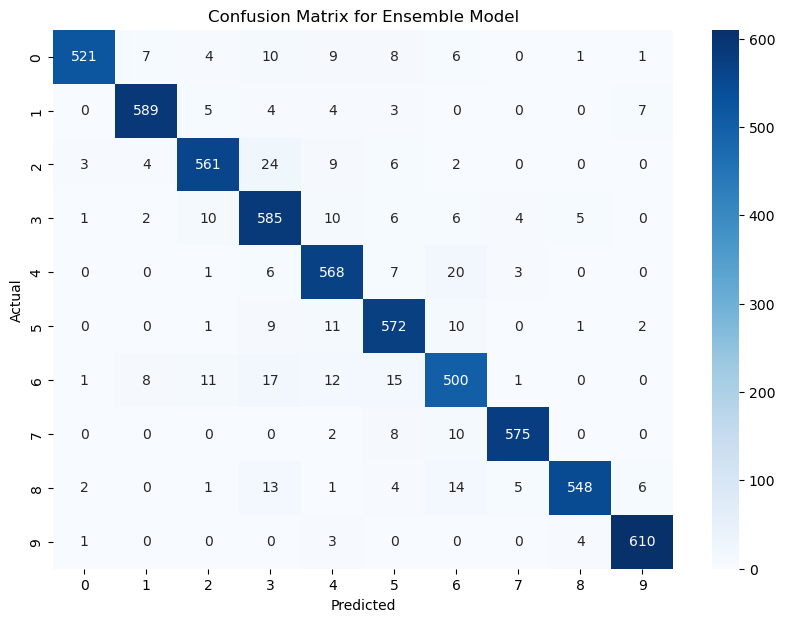

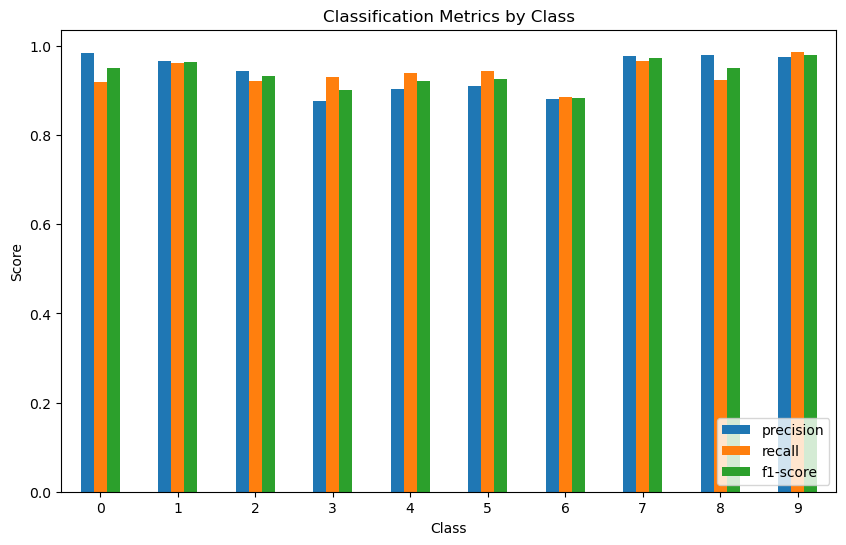

In [99]:
import numpy as np
from tensorflow.keras.applications import ResNet50, VGG16, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Constants
IMAGE_SIZE = (64, 64)
NUM_CLASSES = 10
EPOCHS = 2  # Increased number of epochs for better training
BATCH_SIZE = 32
LEARNING_RATE = 1e-4  # Fine-tuned learning rate

# Function to create a fine-tuned base model
def create_model(base, input_shape, num_classes, learning_rate):
    base_model = base(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Fine-tuning: Unfreeze some layers from base model
    for layer in base_model.layers[-10:]:  # Unfreeze last 10 layers
        layer.trainable = True
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
    x = Dense(256, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create models with fine-tuned learning rates
resnet_model = create_model(ResNet50, (IMAGE_SIZE[0], IMAGE_SIZE[1], 3), NUM_CLASSES, LEARNING_RATE)
vgg_model = create_model(VGG16, (IMAGE_SIZE[0], IMAGE_SIZE[1], 3), NUM_CLASSES, LEARNING_RATE)
densenet_model = create_model(DenseNet121, (IMAGE_SIZE[0], IMAGE_SIZE[1], 3), NUM_CLASSES, LEARNING_RATE)

# Implement early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Train each model with fine-tuned parameters
history_resnet = resnet_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                                  validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])
plot_training(history_resnet, 'ResNet50')

history_vgg = vgg_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                            validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])
plot_training(history_vgg, 'VGG16')

history_densenet = densenet_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                                      validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])
plot_training(history_densenet, 'DenseNet121')

# Get predictions
resnet_preds = np.argmax(resnet_model.predict(X_test), axis=1)
vgg_preds = np.argmax(vgg_model.predict(X_test), axis=1)
densenet_preds = np.argmax(densenet_model.predict(X_test), axis=1)

# Stack predictions for the meta-learner
stacked_predictions = np.stack([resnet_preds, vgg_preds, densenet_preds], axis=1)

# Train meta-learner (Logistic Regression)
meta_learner = LogisticRegression(max_iter=1000)  # Increase max iterations for better convergence
meta_learner.fit(stacked_predictions, y_test)

# Ensemble predictions
ensemble_preds = meta_learner.predict(stacked_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_preds)

print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")
print("Classification Report:")
report = classification_report(y_test, ensemble_preds, output_dict=True)
print(classification_report(y_test, ensemble_preds))

# Confusion matrix plot
cm = confusion_matrix(y_test, ensemble_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

# Plot classification metrics
plot_classification_report(report)


<!-- ## Model 12 Object Detection  -->

In [ ]:
# import tensorflow as tf
# import tensorflow_hub as hub
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image
# import os

# # Load pre-trained object detection model from TensorFlow Hub
# model_url = 'https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1'
# detector = hub.load(model_url)

# def load_and_preprocess_image(image_path, target_size=(640, 640)):
#     # Load the image using PIL
#     image = Image.open(image_path)
    
#     # Convert image to RGB (if it’s not already)
#     image = image.convert('RGB')
    
#     # Resize the image to the target size for detection
#     image = image.resize(target_size, Image.LANCZOS)
    
#     # Convert the image to a NumPy array
#     image_array = np.array(image)
    
#     # Normalize the image
#     image_array = image_array / 255.0
    
#     # Convert to TensorFlow tensor and add batch dimension
#     image_tensor = tf.convert_to_tensor(image_array, dtype=tf.float32)
#     image_tensor = image_tensor[tf.newaxis, :]
    
#     return image_tensor, image

# def detect_objects(image_tensor):
#     # Access the detection function from the model
#     infer = detector.signatures['default']
#     result = infer(image_tensor)
    
#     # Extract results
#     boxes = result['detection_boxes'].numpy()
#     scores = result['detection_scores'].numpy()
#     class_ids = result['detection_class_labels'].numpy()

#     return boxes, class_ids, scores

# def plot_detection_results(image, boxes, class_ids, scores, class_names, display_size=(256, 256)):
#     # Resize image for display
#     display_image = image.resize(display_size, Image.LANCZOS)
#     display_image_width, display_image_height = display_image.size
    
#     plt.figure(figsize=(10, 10))
#     plt.imshow(display_image)
    
#     # Original image dimensions
#     original_width, original_height = image.size
    
#     # Resize bounding boxes to match display image size
#     scale_x = display_image_width / original_width
#     scale_y = display_image_height / original_height
    
#     num_detections = boxes.shape[1] if len(boxes.shape) > 1 else len(boxes)
    
#     for i in range(num_detections):
#         if i >= len(scores) or i >= len(class_ids) or (len(boxes.shape) > 1 and i >= len(boxes[0])):
#             break

#         box = boxes[0][i] if len(boxes.shape) > 1 else boxes[i]
#         score = scores[0][i] if len(scores.shape) > 1 else scores[i]
#         class_id = int(class_ids[0][i]) if len(class_ids.shape) > 1 else int(class_ids[i])
        
#         if 0 <= class_id < len(class_names):
#             class_name = class_names[class_id]
            
#             if score > 0.5:
#                 ymin, xmin, ymax, xmax = box
#                 xmin = int(xmin * original_width)
#                 xmax = int(xmax * original_width)
#                 ymin = int(ymin * original_height)
#                 ymax = int(ymax * original_height)
                
#                 # Scale coordinates for display image
#                 xmin = int(xmin * scale_x)
#                 xmax = int(xmax * scale_x)
#                 ymin = int(ymin * scale_y)
#                 ymax = int(ymax * scale_y)
                
#                 plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='red', linewidth=2))
#                 plt.text(xmin, ymin, f'{class_name}: {score:.2f}', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 2})
    
#     plt.axis('off')
#     plt.show()

# # Define your dataset directory
# extracted_dir = 'EuroSAT/EuroSAT/'

# # Select an image from the "Industrial" class
# industrial_dir = os.path.join(extracted_dir, 'Industrial')
# industrial_images = [os.path.join(industrial_dir, img) for img in os.listdir(industrial_dir) if img.endswith('.jpg') or img.endswith('.png')]

# if industrial_images:
#     sample_image_path = industrial_images[0]  # Select the first image for simplicity

#     # Load and preprocess the image
#     test_image_tensor, test_image = load_and_preprocess_image(sample_image_path)

#     # Perform object detection
#     boxes, class_ids, scores = detect_objects(test_image_tensor)

#     # Define class names (adjust accordingly)
#     class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
#                     'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

#     # Plot detection results
#     plot_detection_results(test_image, boxes, class_ids, scores, class_names, display_size=(256, 256))
# else:
#     print("No images found in the 'Industrial' class directory.")
